<a href="https://colab.research.google.com/github/abhijain864/VTON-Intern/blob/main/human_dimension_extractor/human_dimension_prediction_and_cloth_size_determination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Drive will mount automatically
# from google.colab import drive
# drive.mount('/content/drive')



---



---



#HUMAN DIMENSION PREDICTION

In [ ]:
import cv2
import numpy as np
from skimage.morphology import skeletonize

### BGR
head_part = [0,0,128]
torse_part = [0,128,0]
upper_arm_part = [0,128,128]
lower_arm_part = [128,0,0]
upper_legs_part = [128,0,128]
lower_legs_part = [128,128, 0]

In [ ]:
from google.colab.patches import cv2_imshow
%cd /content/drive/MyDrive/human_dim_trial

/content/drive/MyDrive/human_dim_trial


In [ ]:
i1 = cv2.imread('_front_real.jpg')
m1 = cv2.imread('_front_seg.png')
i2 = cv2.imread('_side_real.jpg')
m2 = cv2.imread('_side_seg.png')

In [ ]:
def get_person_bounding_box(mask, visualize_bbox=False):
	mask_array = np.array(mask, np.uint8)

	complete_body_array = 255*np.ones(mask_array.shape, np.uint8)
	x = (mask_array[:,:,0] == 0) & (mask_array[:,:,1] == 0) & (mask_array[:,:,2] == 0)
	complete_body_array[x, :] = [0,0,0]

	complete_body_array = cv2.cvtColor(complete_body_array,cv2.COLOR_RGB2GRAY)

	(major, minor, _) = cv2.__version__.split(".")
	if (np.int(major) >= 4):
		contours, _ = cv2.findContours(complete_body_array, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
	else:
		_, contours, _ = cv2.findContours(complete_body_array, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

	num_pts = 0
	index = -1
	for j in range(len(contours)):
		pts = cv2.contourArea(contours[j])
		if pts > num_pts:
			index = j
			num_pts = pts

	if index >= 0:
		rec_x, rec_y, rec_w, rec_h = cv2.boundingRect(contours[index])
	else:
		rec_x, rec_y, rec_w, rec_h = [0,0,0,0]

	cv2.rectangle(complete_body_array, (rec_x, rec_y), (rec_x + rec_w, rec_y + rec_h), 255, 2)

	if visualize_bbox:
		cv2_imshow(complete_body_array)
		cv2.waitKey(1)

	return rec_x, rec_y, rec_w, rec_h

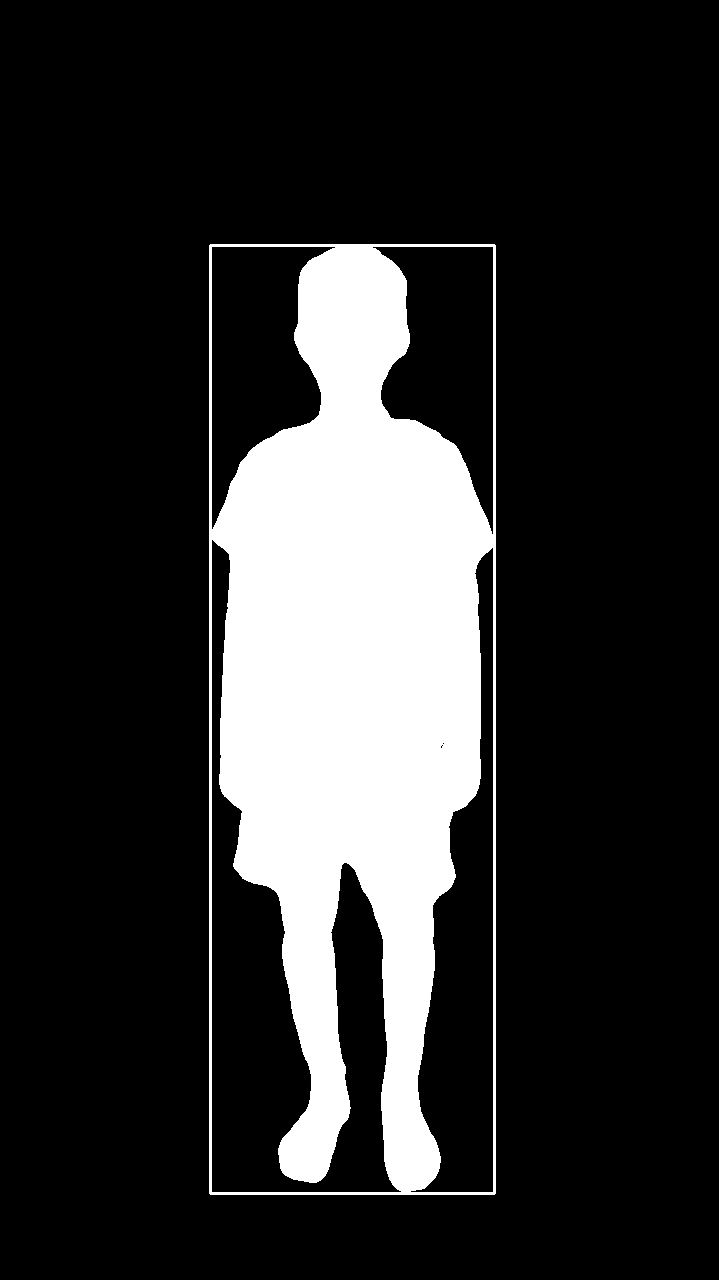

(210, 245, 284, 948)

In [ ]:
# Visualize the above function
# Takes the whole coloured part as the body, and bounds it with a rectangle
get_person_bounding_box(m1,True)

In [ ]:
def get_waist_pixels_mask(mask,show=False):
  mask_array = np.array(mask, np.uint8)
  torse_mask_array = 0*mask_array
  upper_legs_array = 0*mask_array
  waist_array = 0*mask_array
  x = (mask_array[:,:,0] == torse_part[0]) & (mask_array[:,:,1] == torse_part[1]) & (mask_array[:,:,2] == torse_part[2])
  torse_mask_array[x, :] = [255, 255, 255]
  kernel = np.ones((3,3),np.uint8)
  torse_mask_array_dilated = cv2.dilate(torse_mask_array,kernel, iterations = 1)
  x = (mask_array[:,:,0] == upper_legs_part[0]) & (mask_array[:,:,1] == upper_legs_part[1]) & (mask_array[:,:,2] == upper_legs_part[2])
  upper_legs_array[x, :] = [255, 255, 255]
  waist_pixels = (torse_mask_array_dilated[:,:,0] == 255) & (torse_mask_array_dilated[:,:,1] == 255) & (torse_mask_array_dilated[:,:,2] == 255) & (upper_legs_array[:,:,0] == 255) & (upper_legs_array[:,:,1] == 255) & (upper_legs_array[:,:,2] == 255)
  waist_array[waist_pixels, :] = [255, 255, 255]
  if show==True:
    mask_array[waist_pixels]=[255,255,255]
    cv2_imshow(mask_array)
  return waist_array

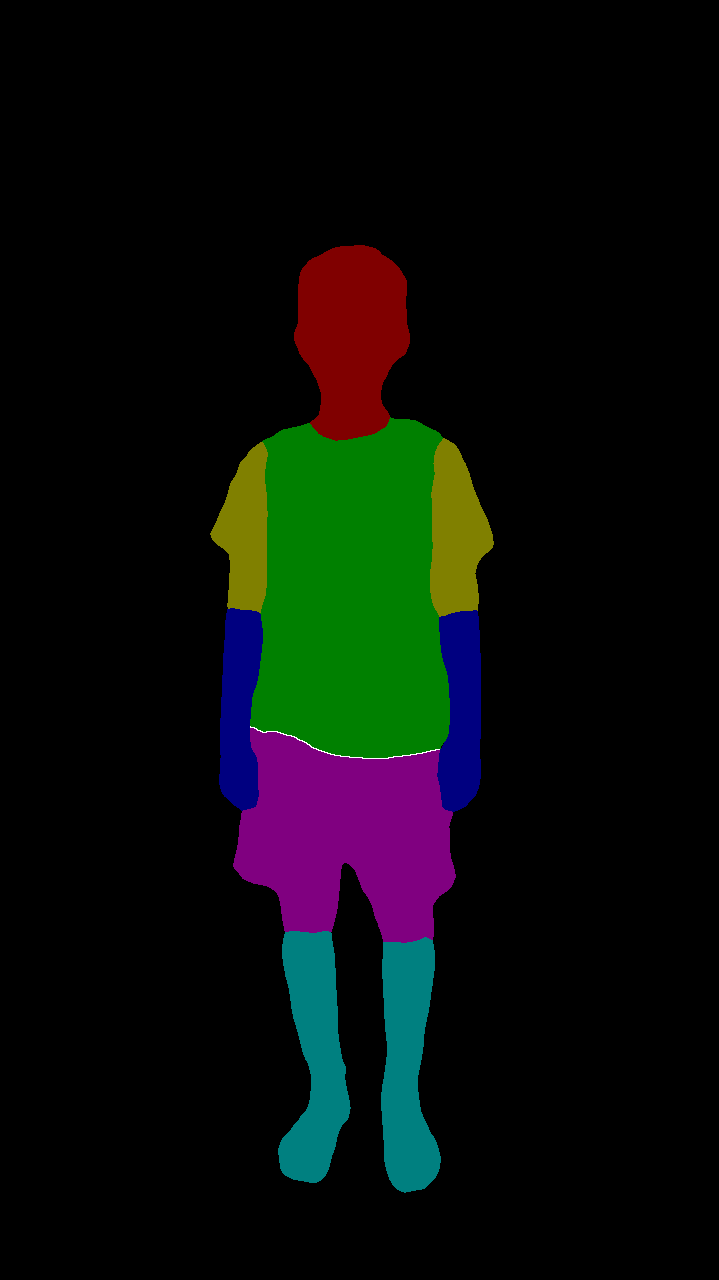

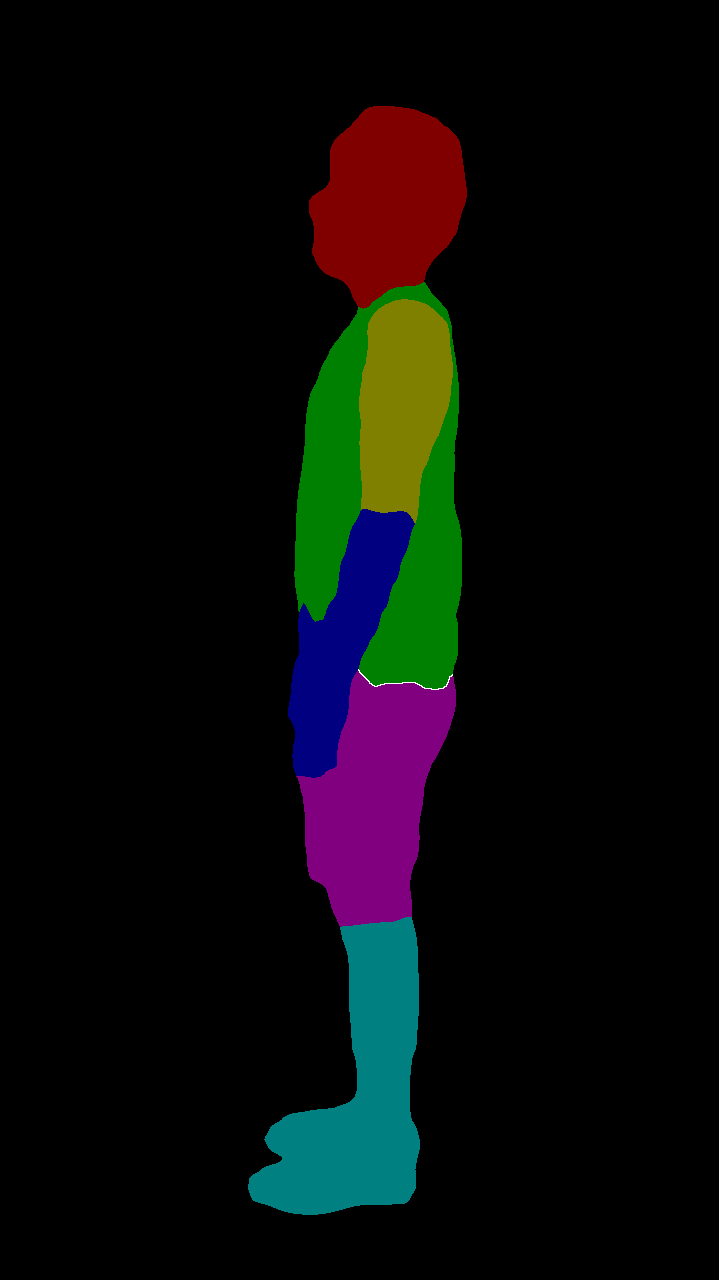

In [ ]:
# Intersection of green and purple
_ = get_waist_pixels_mask(m1,show=True)
_ = get_waist_pixels_mask(m2,show=True)

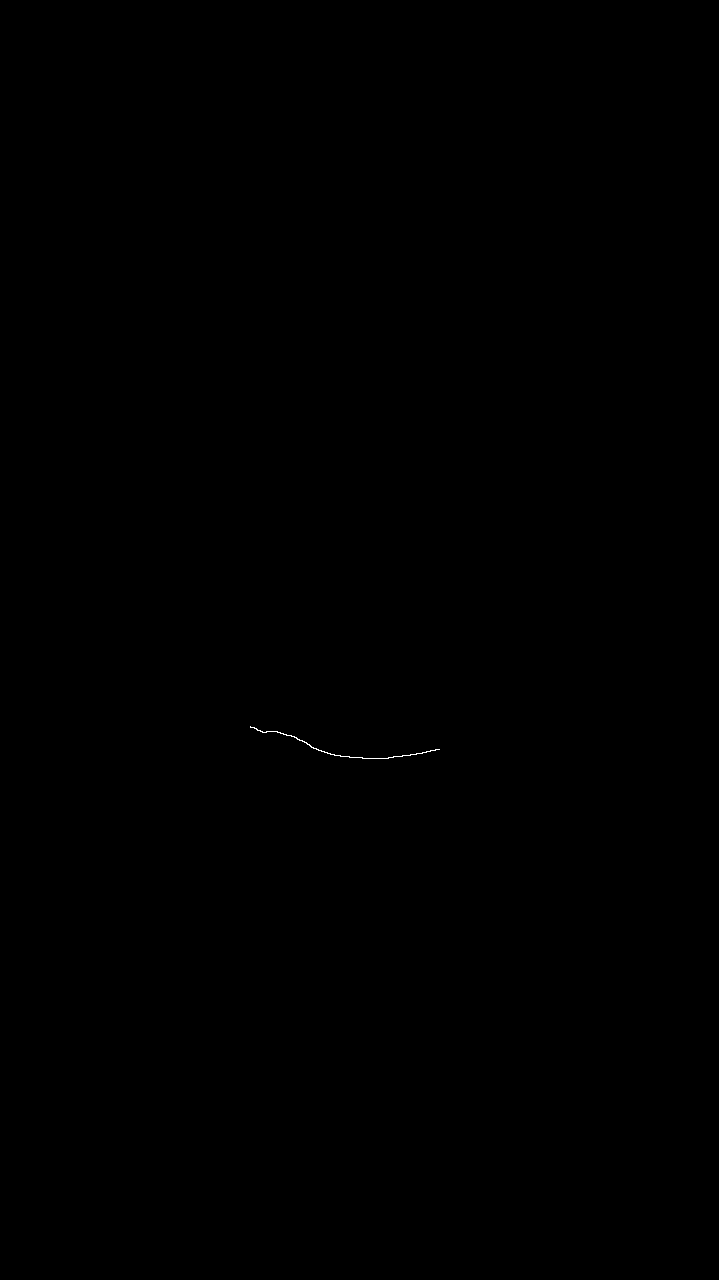

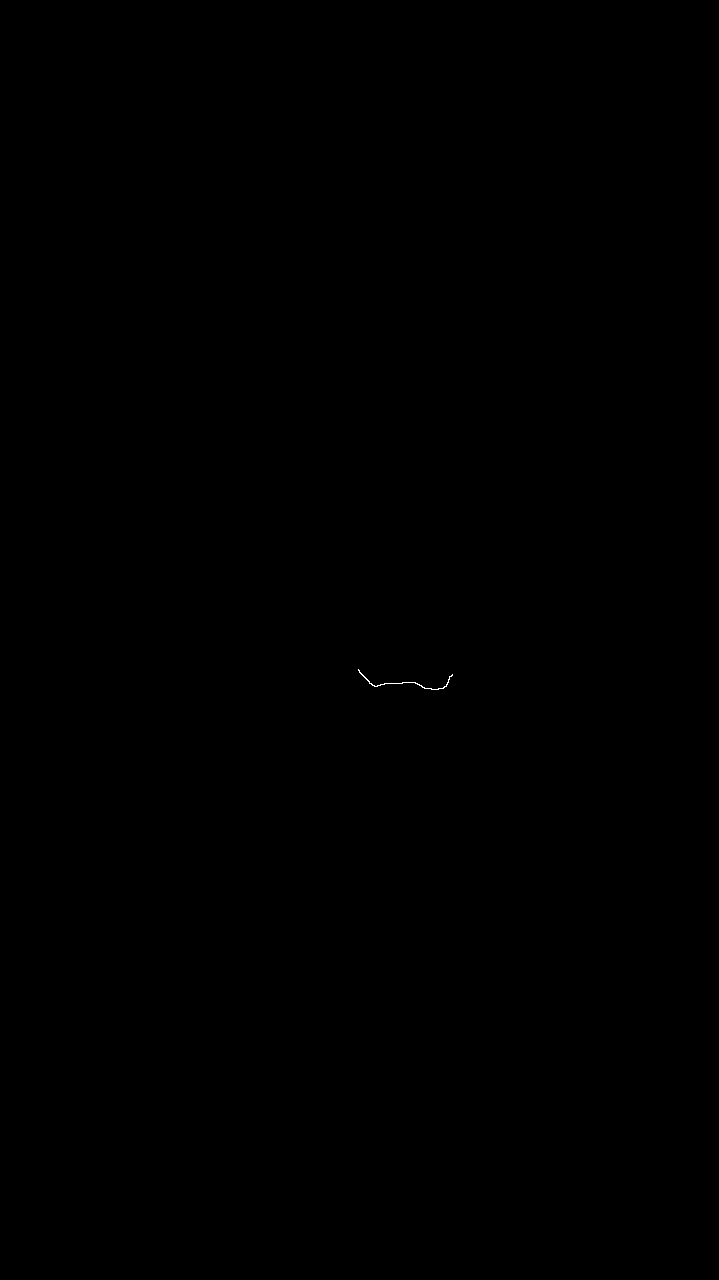

In [ ]:
# These are the masks that the function returns
cv2_imshow(get_waist_pixels_mask(m1))
cv2_imshow(get_waist_pixels_mask(m2))

In [ ]:
def get_chest_pixels_mask(mask,show=False):
  mask_array = np.array(mask, np.uint8)

  torse_mask_array = 0*mask_array
  upper_arm_part_array = 0*mask_array
  chest_array = 0*mask_array

  x = (mask_array[:,:,0] == torse_part[0]) & (mask_array[:,:,1] == torse_part[1]) & (mask_array[:,:,2] == torse_part[2])
  torse_mask_array[x, :] = [255, 255, 255]

  kernel = np.ones((3,3),np.uint8)
  torse_mask_array_dilated = cv2.dilate(torse_mask_array,kernel, iterations = 1)

  x = (mask_array[:,:,0] == upper_arm_part[0]) & (mask_array[:,:,1] == upper_arm_part[1]) & (mask_array[:,:,2] == upper_arm_part[2])
  upper_arm_part_array[x, :] = [255, 255, 255]

  chest_pixels = (torse_mask_array_dilated[:,:,0] == 255) & (torse_mask_array_dilated[:,:,1] == 255) & (torse_mask_array_dilated[:,:,2] == 255) & (upper_arm_part_array[:,:,0] == 255) & (upper_arm_part_array[:,:,1] == 255) & (upper_arm_part_array[:,:,2] == 255)
  chest_array[chest_pixels, :] = [255, 255, 255]
  if show==True:
    mask_array[chest_pixels] = [255,255,255]
    cv2_imshow(mask_array)
  return chest_array

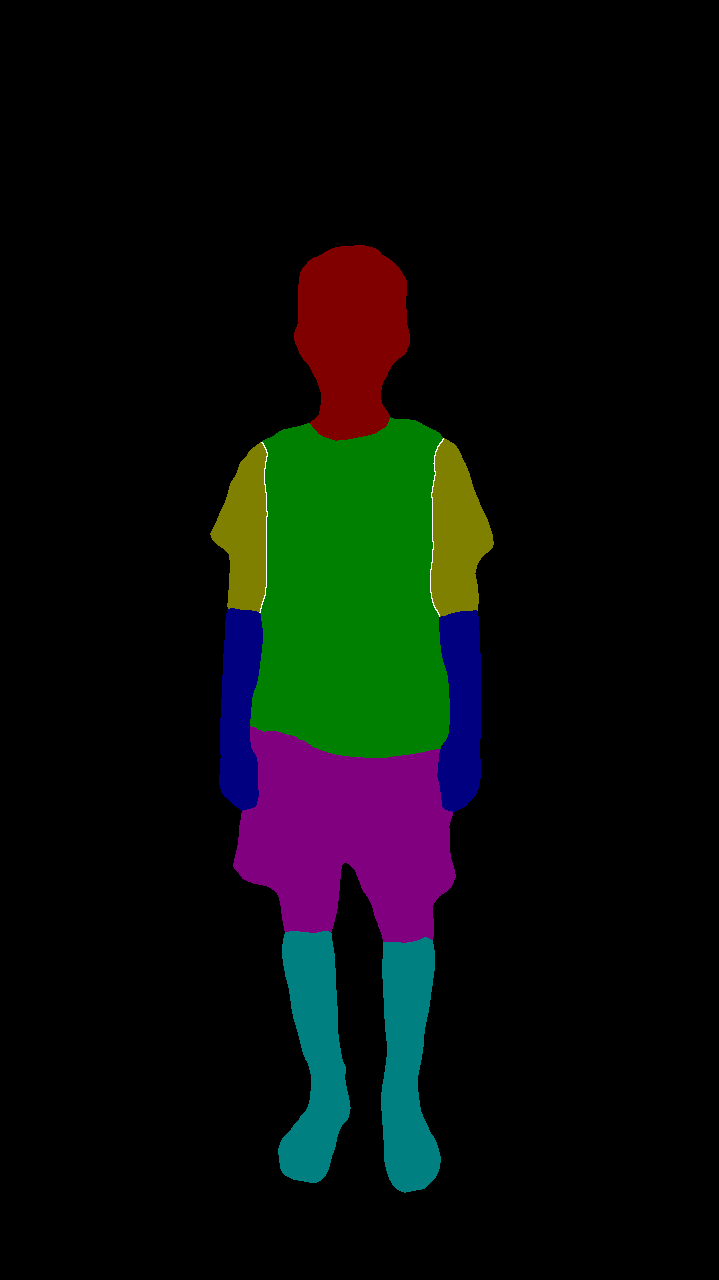

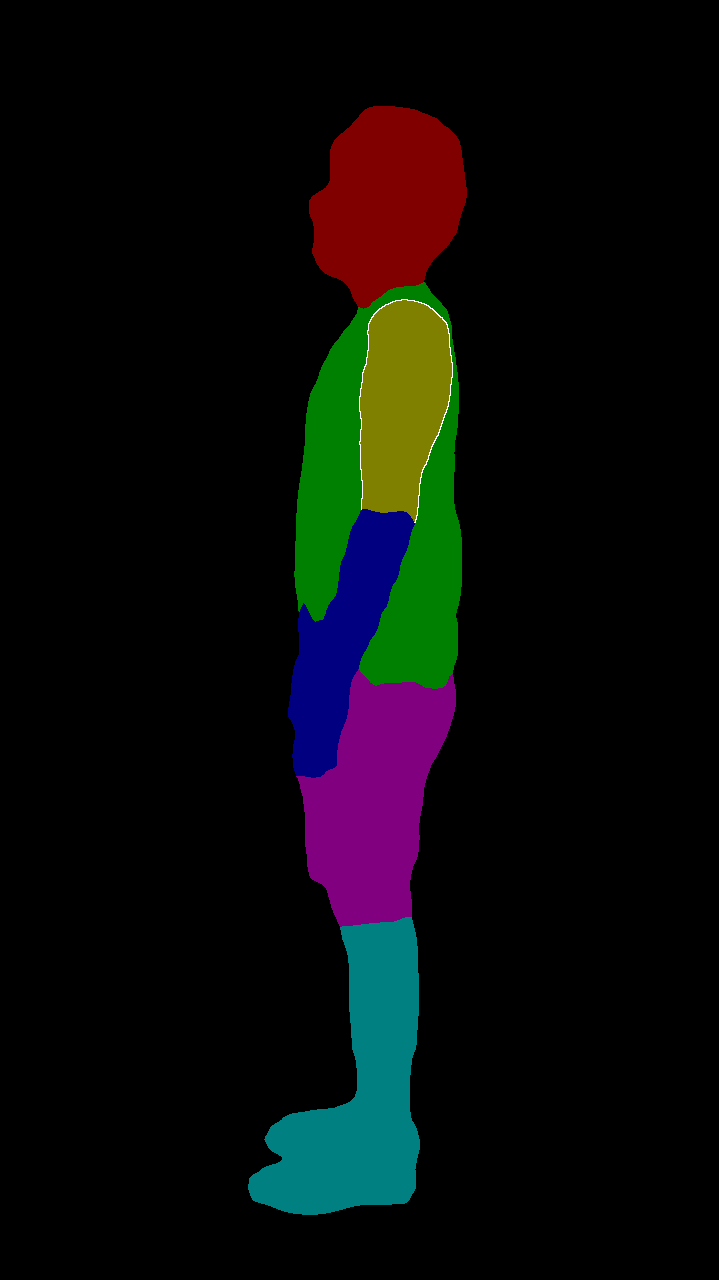

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
# Intersection of green and yellow
get_chest_pixels_mask(m1,True)
get_chest_pixels_mask(m2,True)

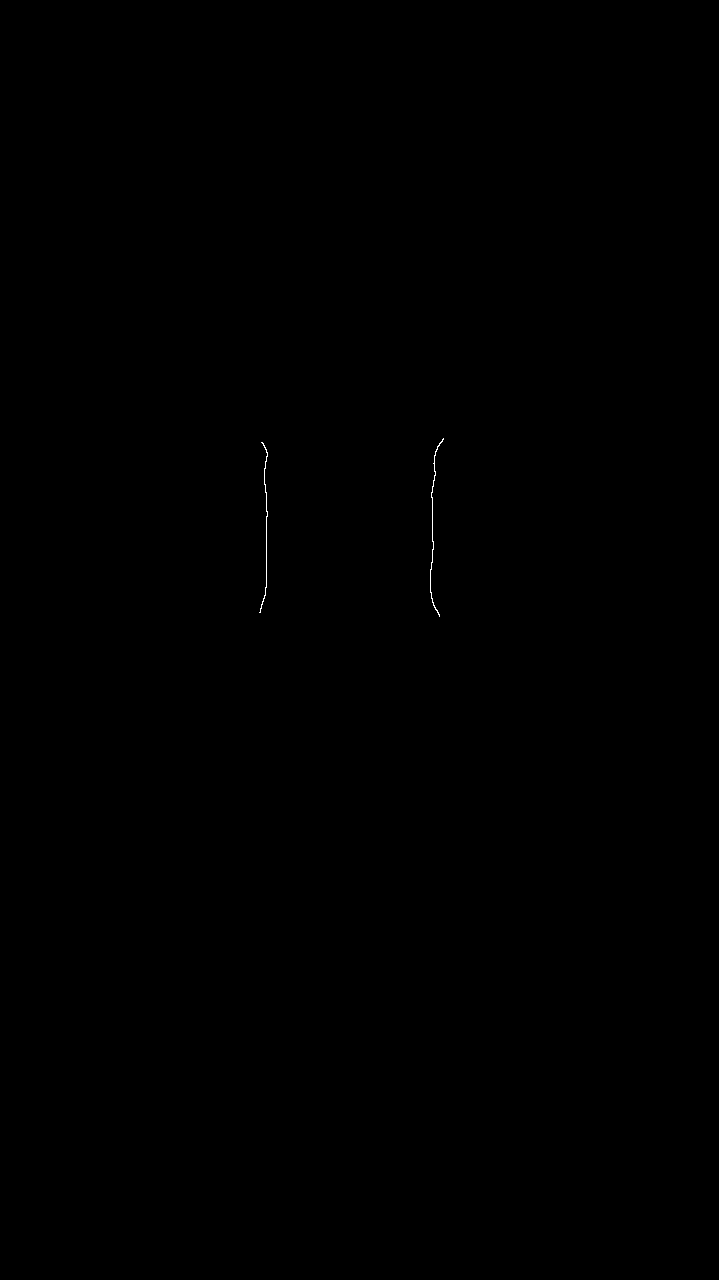

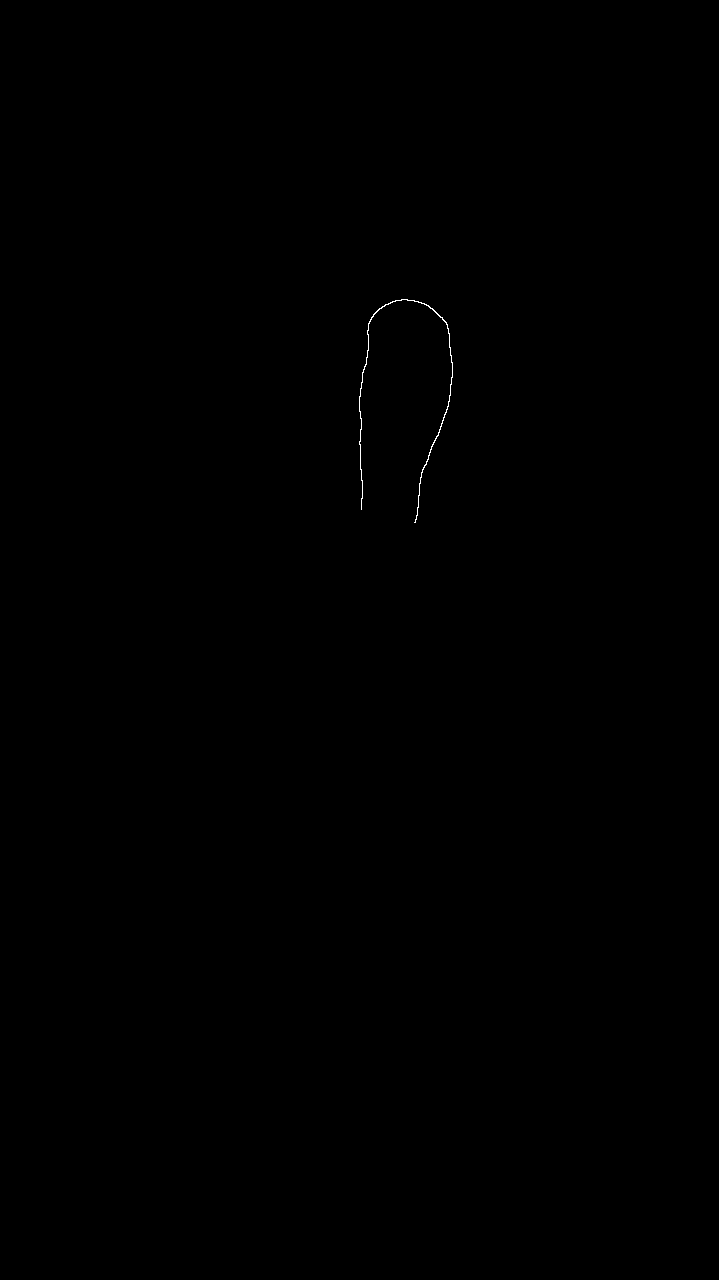

In [ ]:
# These are the masks that the function returns
cv2_imshow(get_chest_pixels_mask(m1))
cv2_imshow(get_chest_pixels_mask(m2))

In [ ]:
def get_chest_pixels(mask,show=False):
  chest_mask = get_chest_pixels_mask(mask)
  rec_x, rec_y, rec_w, rec_h = get_part_bounding_box(chest_mask)

  chest_array = 0*chest_mask
  chest_array[rec_y+rec_h,:,:] = [255,255,255]

  mask_array = np.array(mask, np.uint8)
  torse_mask_array = 0*mask_array
  x = (mask_array[:,:,0] == torse_part[0]) & (mask_array[:,:,1] == torse_part[1]) & (mask_array[:,:,2] == torse_part[2])
  torse_mask_array[x, :] = [255, 255, 255]

  chest_pixels = (chest_array[:,:,0] == 255) & (chest_array[:,:,1] == 255) & (chest_array[:,:,2] == 255) & (torse_mask_array[:,:,0] == 255) & (torse_mask_array[:,:,1] == 255) & (torse_mask_array[:,:,2] == 255)
  chest_array = 0*chest_mask
  chest_array[chest_pixels,:] = [255,255,255]

  if show:
    mask_array[chest_pixels,:] = [255,255,255]
    cv2_imshow(mask_array)
  return chest_array

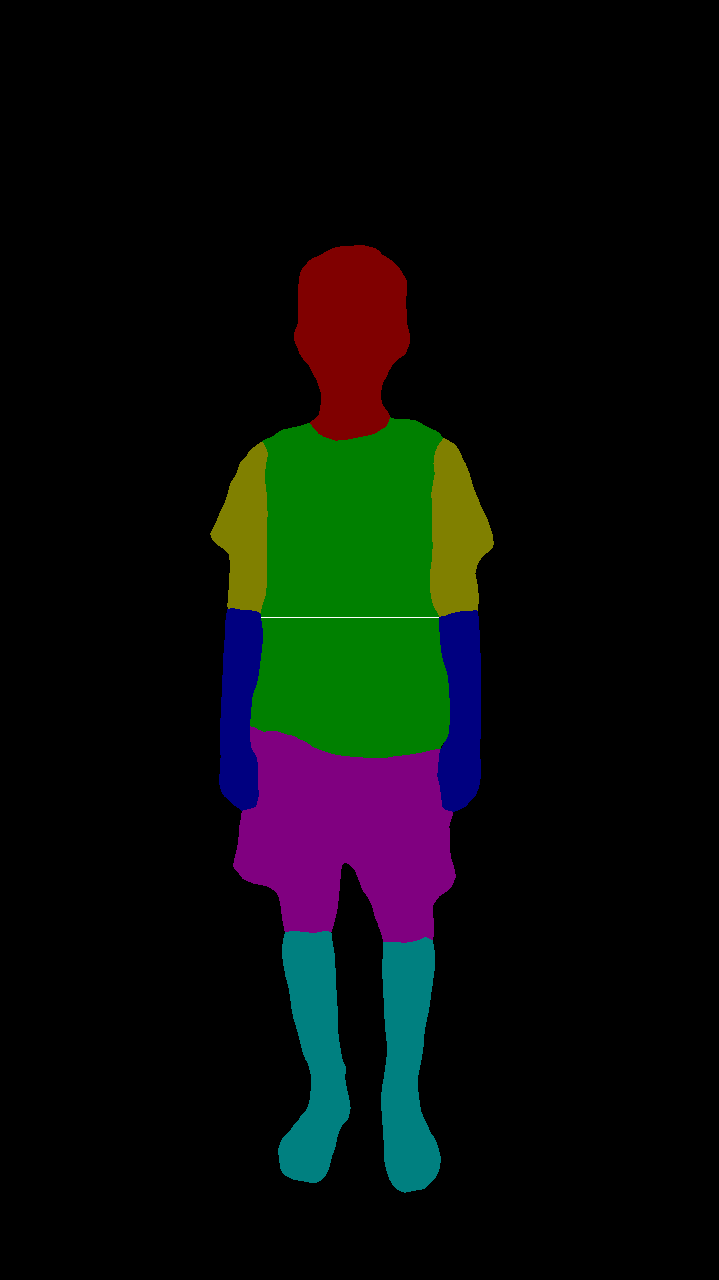

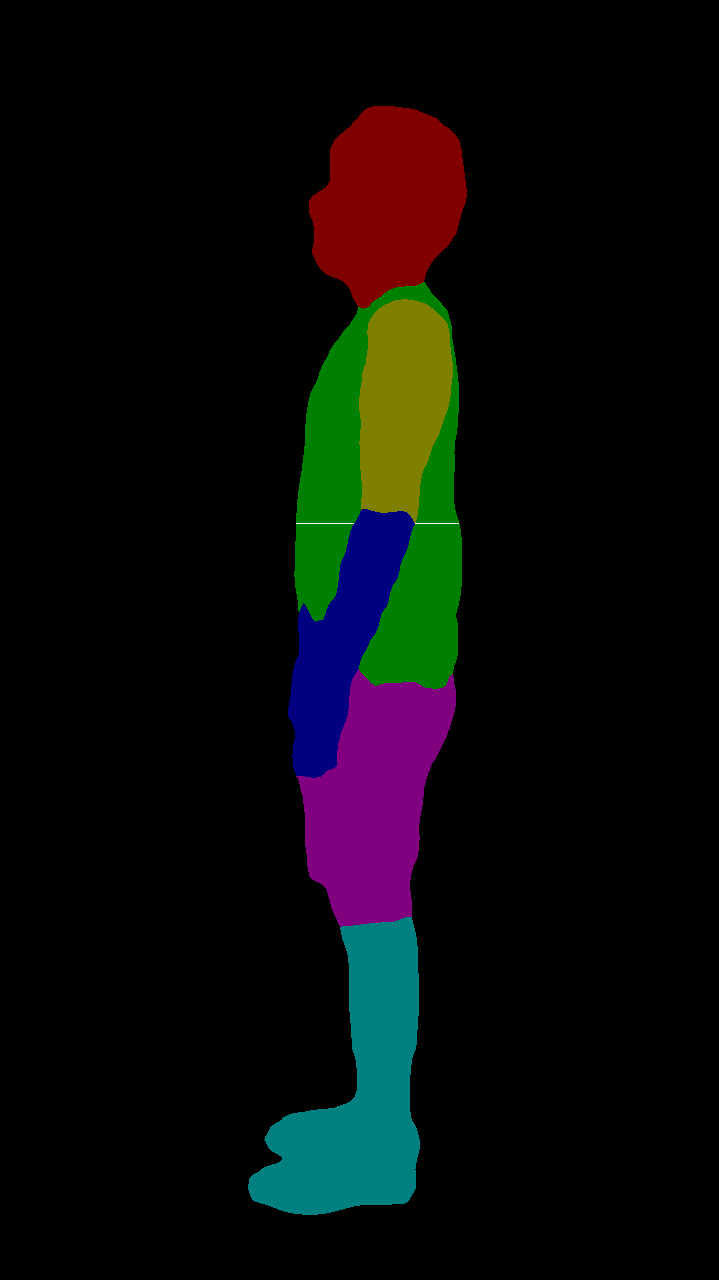

In [ ]:
# First the bounded rectangle of chest_pixels_mask is found, then the lower edge of the rectangle intersected with the green part is taken
# The white line is the chest being taken
_ = get_chest_pixels(m1,show=True)
_ = get_chest_pixels(m2,show=True)

In [ ]:
def get_shoulder_pixels(mask,show=False):
  chest_mask = get_chest_pixels_mask(mask)
  rec_x, rec_y, rec_w, rec_h = get_part_bounding_box(chest_mask)

  shoulder_array = 0*chest_mask
  shoulder_array[rec_y,:,:] = [255,255,255]

  mask_array = np.array(mask, np.uint8)
  torse_mask_array = 0*mask_array
  x = (mask_array[:,:,0] == torse_part[0]) & (mask_array[:,:,1] == torse_part[1]) & (mask_array[:,:,2] == torse_part[2])
  torse_mask_array[x, :] = [255, 255, 255]

  chest_pixels = (shoulder_array[:,:,0] == 255) & (shoulder_array[:,:,1] == 255) & (shoulder_array[:,:,2] == 255) & (torse_mask_array[:,:,0] == 255) & (torse_mask_array[:,:,1] == 255) & (torse_mask_array[:,:,2] == 255)
  shoulder_array = 0*chest_mask
  shoulder_array[chest_pixels,:] = [255,255,255]
  if show==True:
    mask_array[chest_pixels,:] = [255,255,255]
    cv2_imshow(mask_array)

  return shoulder_array

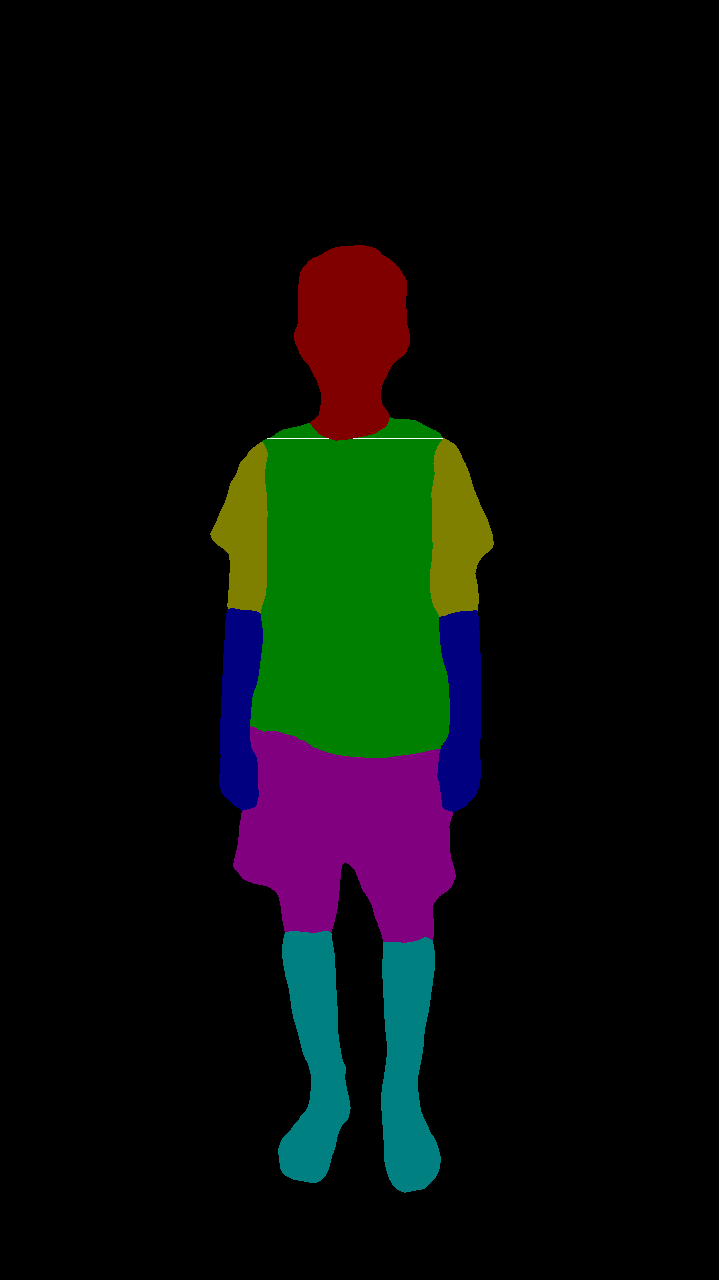

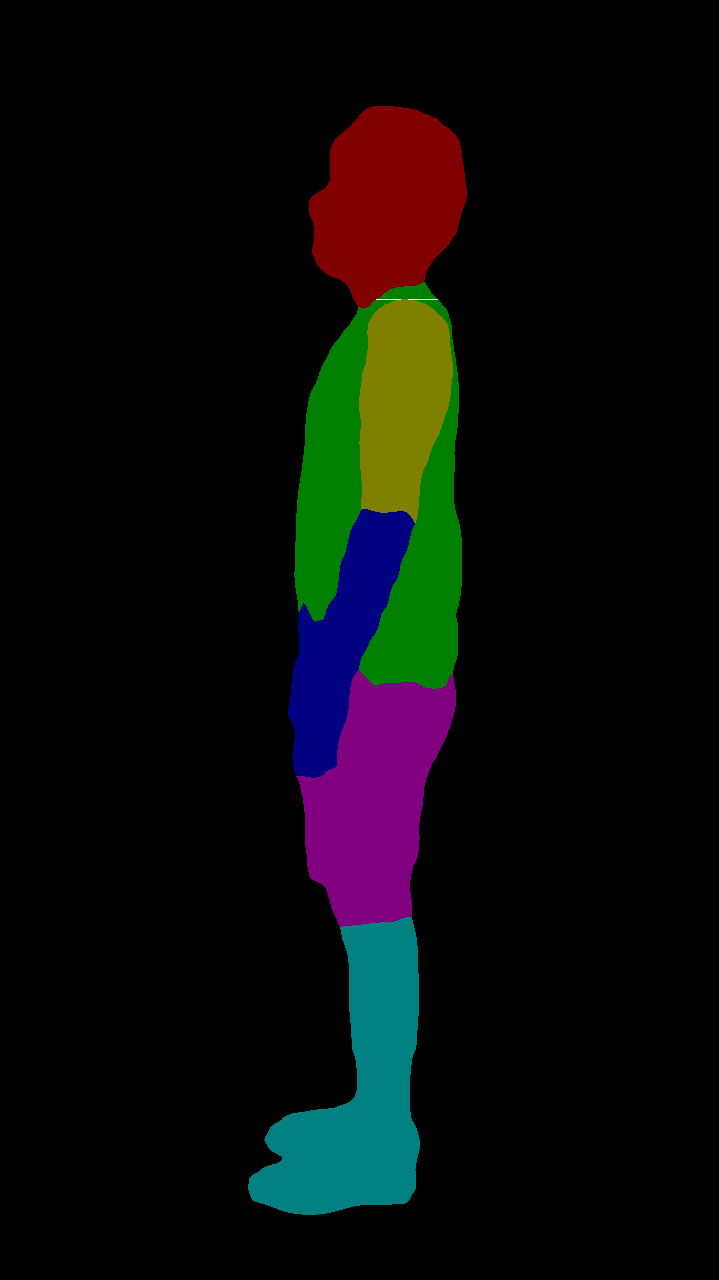

In [ ]:
# White line is the shoulder
# First the bounded rectangle of the chest_pixel_mask is found, then its upper edge intersected with green part is taken
_ = get_shoulder_pixels(m1,show=True)
_ = get_shoulder_pixels(m2,show=True)

In [ ]:
# Returns bounded rectangle (x,y coordinate of Top Left point, and the width and height) for the mask of the part_provided
def get_part_bounding_box(mask, visualize_bbox=False):
	mask = np.array(mask, np.uint8)
	mask = cv2.cvtColor(mask,cv2.COLOR_RGB2GRAY)

	(major, minor, _) = cv2.__version__.split(".")
	if (np.int(major) >= 4):
		contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
	else:
		_, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

	rec_x, rec_y, rec_w, rec_h = [0,0,0,0]
	final_contour = []

	for j in range(len(contours)):
		for k in range(len(contours[j])):
			final_contour.append(contours[j][k])


	if len(contours) > 0:
		rec_x, rec_y, rec_w, rec_h = cv2.boundingRect(np.array(final_contour))
		


	cv2.rectangle(mask, (rec_x, rec_y), (rec_x + rec_w, rec_y + rec_h), 255, 2)

	if visualize_bbox:
		cv2_imshow(mask)
		# cv2.waitKey(1)

	return rec_x, rec_y, rec_w, rec_h

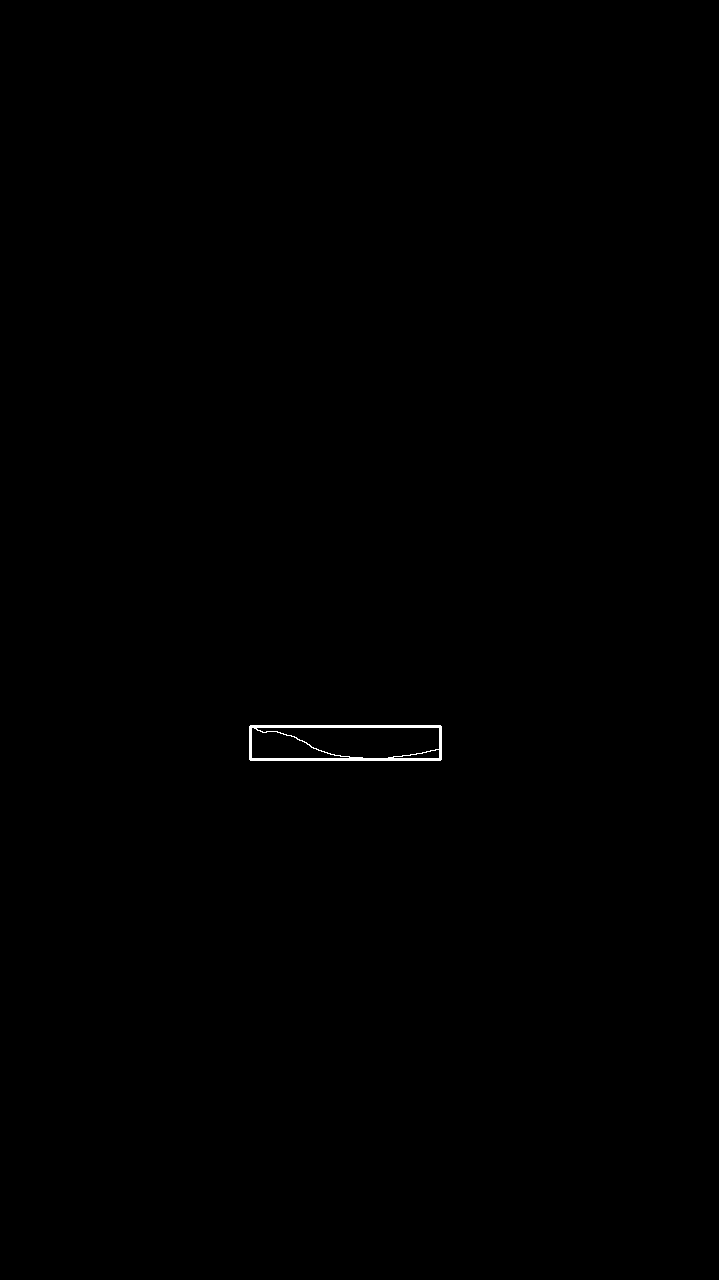

(250, 726, 190, 33)

In [ ]:
# Visualize the above function with waist_mask
waist_array = get_waist_pixels_mask(m1)
get_part_bounding_box(waist_array,True)

In [ ]:
  # Returns chest, waist as the width of the bounded rectangle bounding that part,and also prints a picture
  def get_front_chest_and_waist(image, mask, visualize=False):
    # image = np.array(image)
    waist_mask = get_waist_pixels_mask(mask)
    waist_bbox = get_part_bounding_box(waist_mask)

    chest_mask = get_chest_pixels(mask)
    chest_bbox = get_part_bounding_box(chest_mask)

    person_bbox = get_person_bounding_box(mask)

    p1 = (waist_bbox[0], np.int(waist_bbox[1] + waist_bbox[3]/2))
    p2 = (waist_bbox[0] + waist_bbox[2], np.int(waist_bbox[1] + waist_bbox[3]/2))
    cv2.arrowedLine(image, p1, p2, (0,0,255), 2, tipLength = 0.1)
    cv2.arrowedLine(image, p2, p1, (0,0,255), 2, tipLength = 0.1)
    # Horizontal line cutting rectangle into two equal parts

    p1 = (chest_bbox[0], np.int(chest_bbox[1] + chest_bbox[3]/2))
    p2 = (chest_bbox[0] + chest_bbox[2], np.int(chest_bbox[1] + chest_bbox[3]/2))
    cv2.arrowedLine(image, p1, p2, (0,0,255), 2, tipLength = 0.1)
    cv2.arrowedLine(image, p2, p1, (0,0,255), 2, tipLength = 0.1)


    p1 = (np.int(person_bbox[0] + 1.1*person_bbox[2]), person_bbox[1])
    p2 = (np.int(person_bbox[0] + 1.1*person_bbox[2]), np.int(person_bbox[1] + person_bbox[3]))
    cv2.arrowedLine(image, p1, p2, (255,0,255), 2, tipLength = 0.03)
    cv2.arrowedLine(image, p2, p1, (255,0,255), 2, tipLength = 0.03)


    if visualize==True:
      cv2_imshow(image)
      # cv2.waitKey(1)

    return image, waist_bbox[2], chest_bbox[2], person_bbox[3]

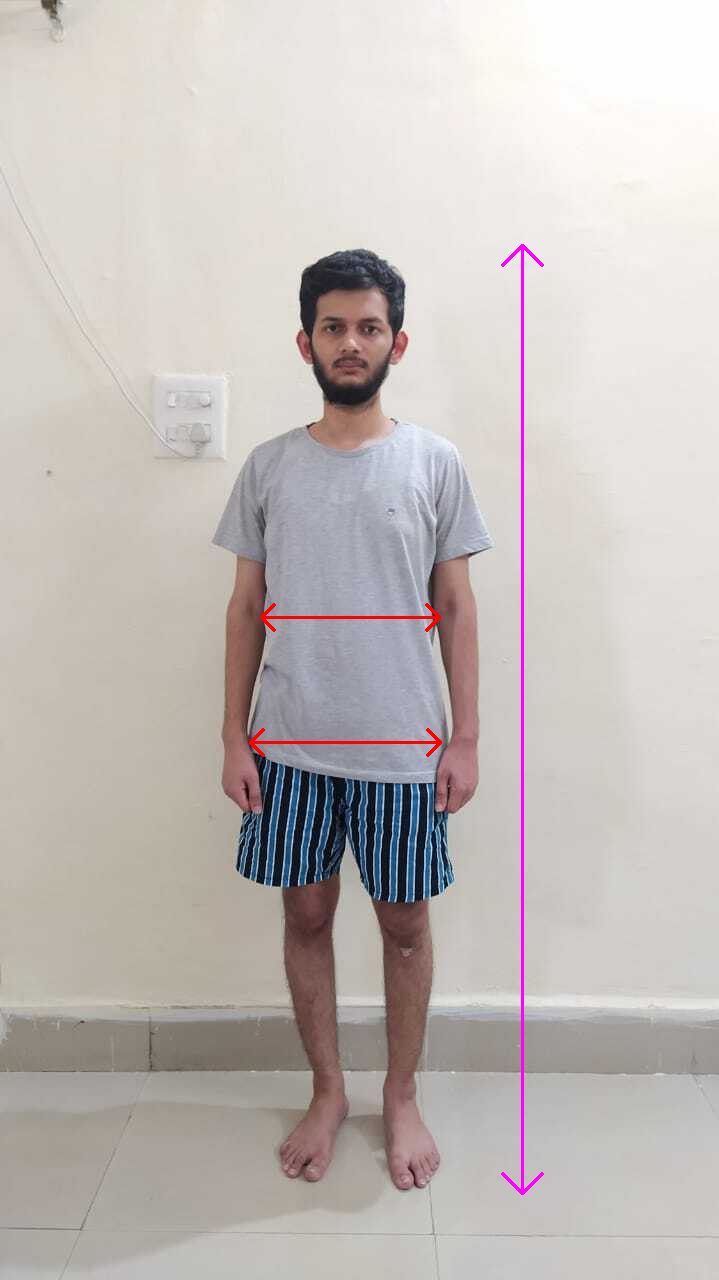

(array([[[182, 192, 199],
         [182, 192, 199],
         [182, 192, 199],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[191, 201, 208],
         [191, 201, 208],
         [191, 201, 208],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[195, 205, 212],
         [195, 205, 212],
         [195, 205, 212],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[181, 181, 181],
         [182, 182, 182],
         [182, 182, 182],
         ...,
         [199, 202, 206],
         [199, 202, 206],
         [199, 202, 206]],
 
        [[182, 182, 182],
         [182, 182, 182],
         [183, 183, 183],
         ...,
         [198, 201, 205],
         [198, 201, 205],
         [198, 201, 205]],
 
        [[182, 182, 182],
         [182, 182, 182],
         [183, 183, 183],
         ...,
         [198, 201, 205],
  

In [ ]:
get_front_chest_and_waist(i1,m1,True)

In [ ]:
def get_shoulder(image, mask, visualize=False):
  # image= np.array(image)
  shoulder_mask = get_shoulder_pixels(mask)
  shoulder_bbox = get_part_bounding_box(shoulder_mask)

  p1 = (shoulder_bbox[0], np.int(shoulder_bbox[1] + shoulder_bbox[3]/2))
  p2 = (shoulder_bbox[0] + shoulder_bbox[2], np.int(shoulder_bbox[1] + shoulder_bbox[3]/2))
  cv2.arrowedLine(image, p1, p2, (0,0,255), 2, tipLength = 0.1)
  cv2.arrowedLine(image, p2, p1, (0,0,255), 2, tipLength = 0.1)

  if visualize:
    cv2_imshow(image)
  return shoulder_bbox[2]

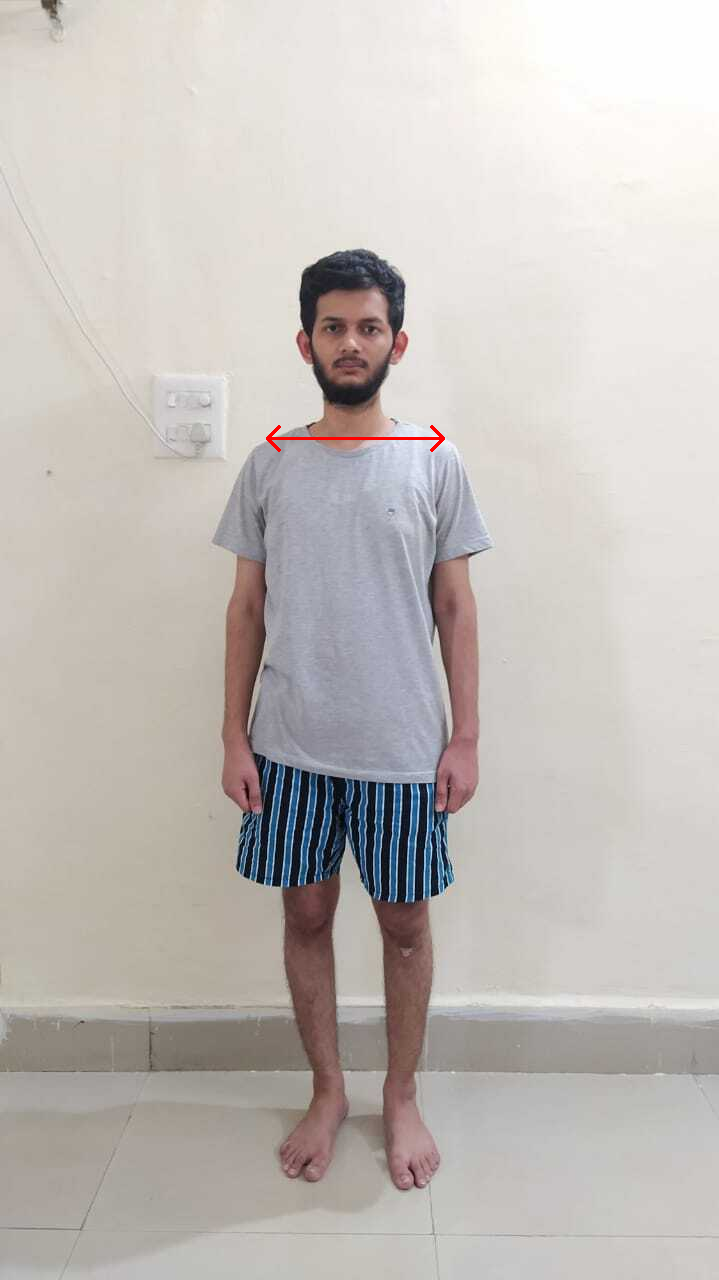

176

In [ ]:
get_shoulder(i1,m1,True)

In [ ]:
  def get_side_chest_and_waist(image, mask, visualize=False):
    # image = np.array(image)
    waist_mask = get_waist_pixels_mask(mask)
    waist_bbox = get_part_bounding_box(waist_mask)

    chest_mask = get_chest_pixels(mask)
    chest_bbox = get_part_bounding_box(chest_mask)

    person_bbox = get_person_bounding_box(mask)

    p1 = (waist_bbox[0], np.int(waist_bbox[1] + waist_bbox[3]/2))
    p2 = (waist_bbox[0] + waist_bbox[2], np.int(waist_bbox[1] + waist_bbox[3]/2))
    cv2.arrowedLine(image, p1, p2, (0,0,255), 2, tipLength = 0.1)
    cv2.arrowedLine(image, p2, p1, (0,0,255), 2, tipLength = 0.1)


    p1 = (chest_bbox[0], np.int(chest_bbox[1] + chest_bbox[3]/2))
    p2 = (chest_bbox[0] + chest_bbox[2], np.int(chest_bbox[1] + chest_bbox[3]/2))
    cv2.arrowedLine(image, p1, p2, (0,0,255), 2, tipLength = 0.1)
    cv2.arrowedLine(image, p2, p1, (0,0,255), 2, tipLength = 0.1)


    p1 = (np.int(person_bbox[0] + 1.1*person_bbox[2]), person_bbox[1])
    p2 = (np.int(person_bbox[0] + 1.1*person_bbox[2]), np.int(person_bbox[1] + person_bbox[3]))
    cv2.arrowedLine(image, p1, p2, (255,0,255), 2, tipLength = 0.03)
    cv2.arrowedLine(image, p2, p1, (255,0,255), 2, tipLength = 0.03)


    if visualize==True:
      
      cv2_imshow(image)
      # cv2.waitKey(1)

    return image, waist_bbox[2], chest_bbox[2], person_bbox[3]

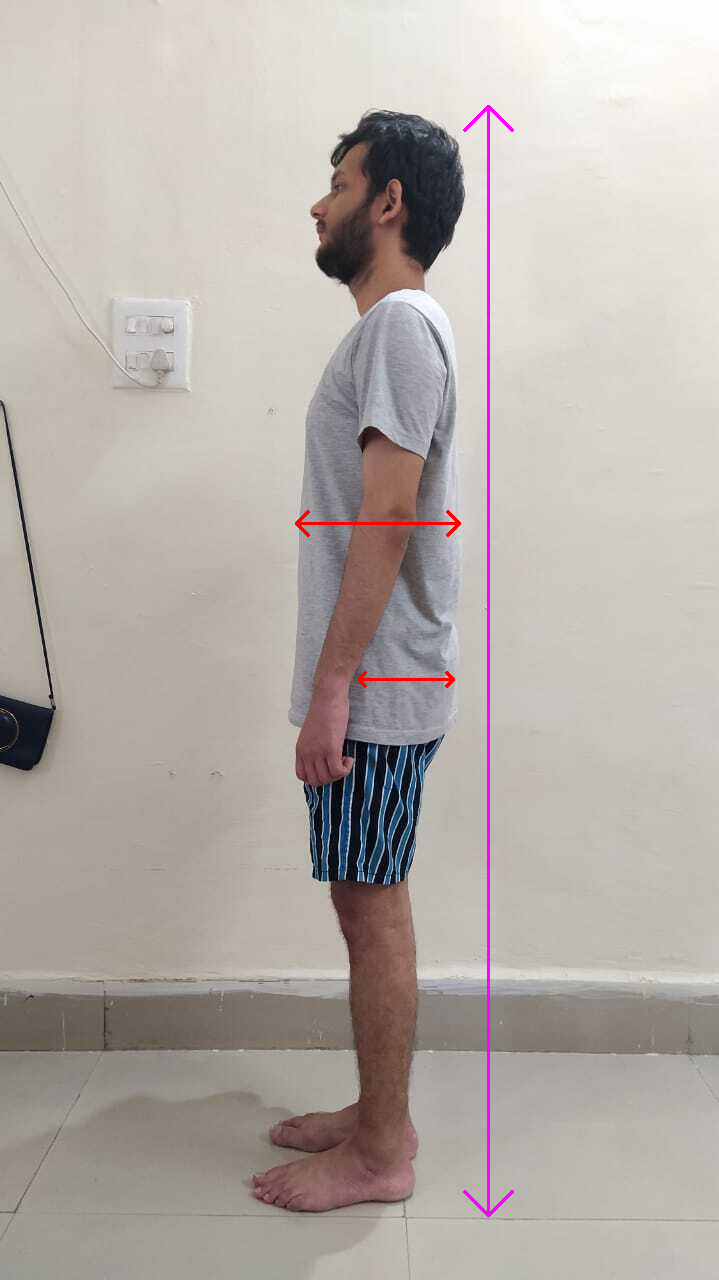

(array([[[193, 203, 210],
         [193, 203, 210],
         [193, 203, 210],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[193, 203, 210],
         [193, 203, 210],
         [193, 203, 210],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[193, 203, 210],
         [193, 203, 210],
         [193, 203, 210],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[148, 153, 152],
         [148, 153, 152],
         [148, 153, 152],
         ...,
         [187, 190, 194],
         [187, 190, 194],
         [187, 190, 194]],
 
        [[148, 153, 152],
         [148, 153, 152],
         [148, 153, 152],
         ...,
         [186, 189, 193],
         [186, 189, 193],
         [186, 189, 193]],
 
        [[148, 153, 152],
         [148, 153, 152],
         [148, 153, 152],
         ...,
         [186, 189, 193],
  

In [ ]:
get_side_chest_and_waist(i2,m2,True)

In [ ]:
def get_human_head_torse_fraction_of_actual_height(image, mask,visualize = False):
  person_bbox = get_person_bounding_box(mask)


  mask_array = np.array(mask, np.uint8)
  head_torse_array = 0*mask_array


  x = (mask_array[:,:,0] == torse_part[0]) & (mask_array[:,:,1] == torse_part[1]) & (mask_array[:,:,2] == torse_part[2])
  head_torse_array[x, :] = [255, 255, 255]

  x = (mask_array[:,:,0] == head_part[0]) & (mask_array[:,:,1] == head_part[1]) & (mask_array[:,:,2] == head_part[2])
  head_torse_array[x, :] = [255, 255, 255]


  part_bbox = get_part_bounding_box(head_torse_array)

  if visualize:
    image = np.array(image)
    rec_x,rec_y,rec_w,rec_h = part_bbox
    cv2.rectangle(image, (rec_x, rec_y), (rec_x + rec_w, rec_y + rec_h), 255, 2)
    p1 = (np.int(part_bbox[0] + part_bbox[2]), part_bbox[1])
    p2 = (np.int(part_bbox[0] + part_bbox[2]), np.int(part_bbox[1] + part_bbox[3]))
    cv2.arrowedLine(image, p1, p2, (255,0,255), 2, tipLength = 0.03)
    cv2.arrowedLine(image, p2, p1, (255,0,255), 2, tipLength = 0.03)
    cv2_imshow(image)

  return person_bbox[3], part_bbox[3]

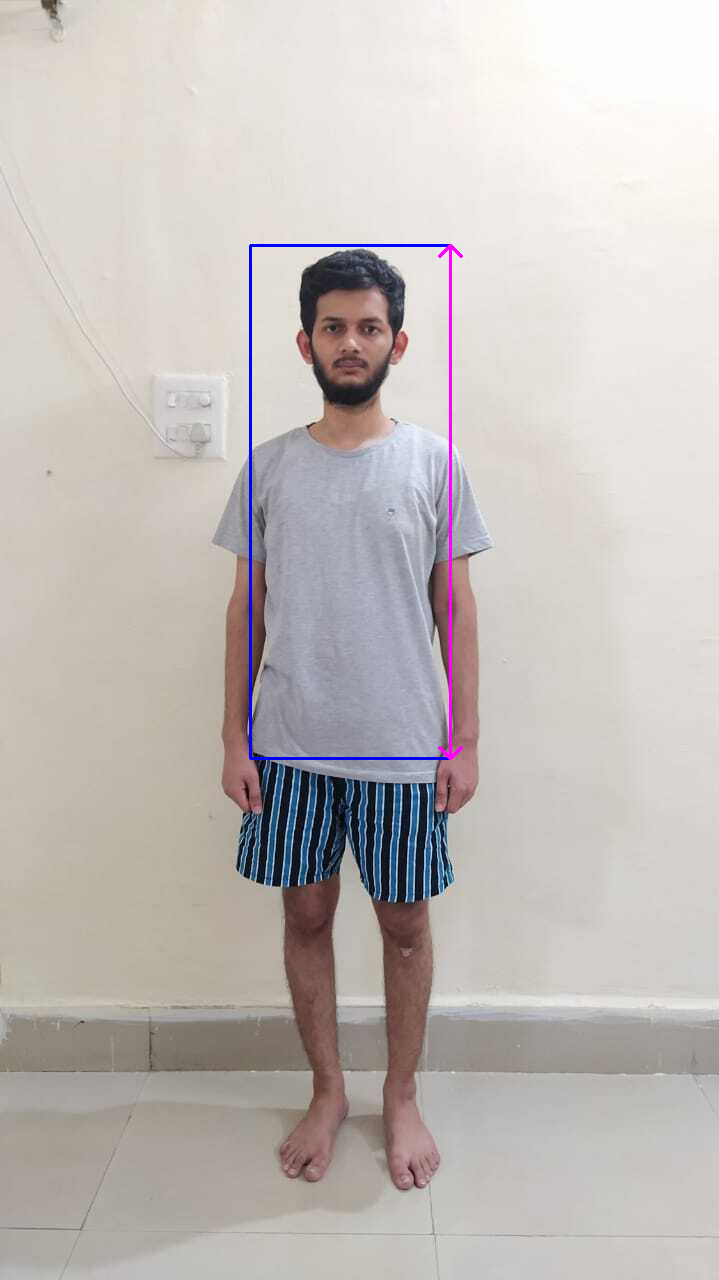

(948, 513)

In [ ]:
get_human_head_torse_fraction_of_actual_height(i1,m1,True)

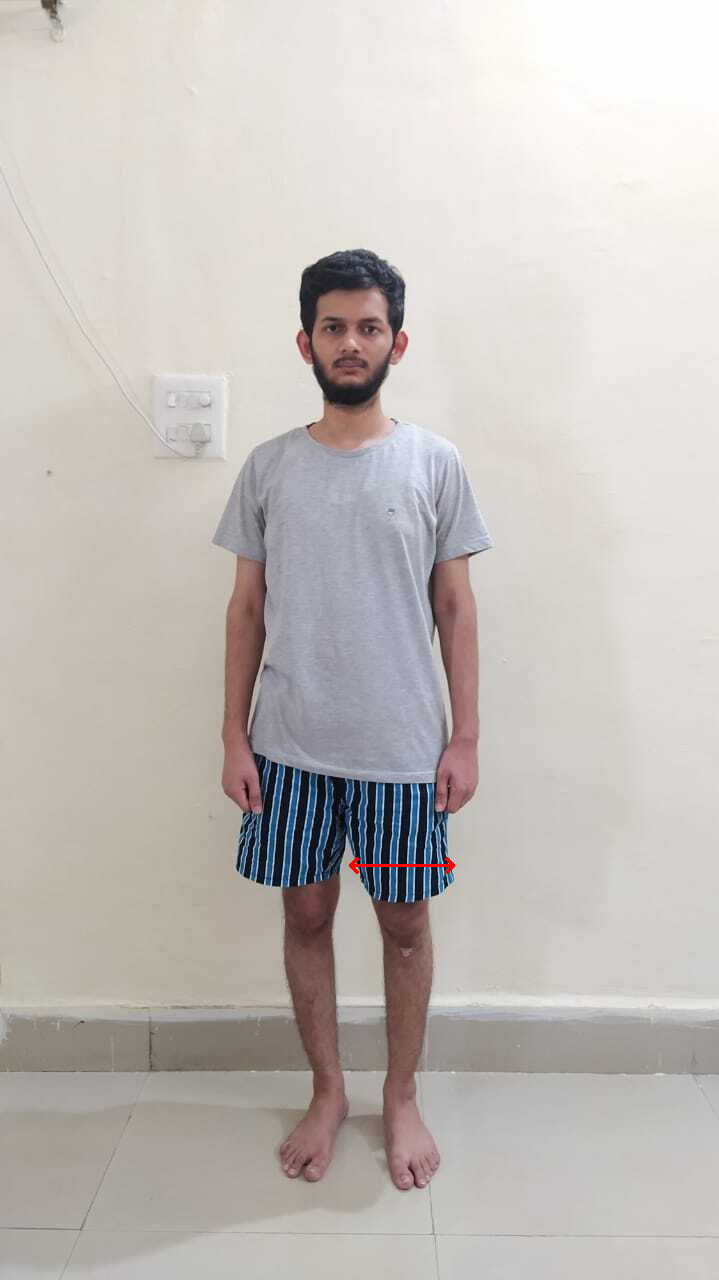

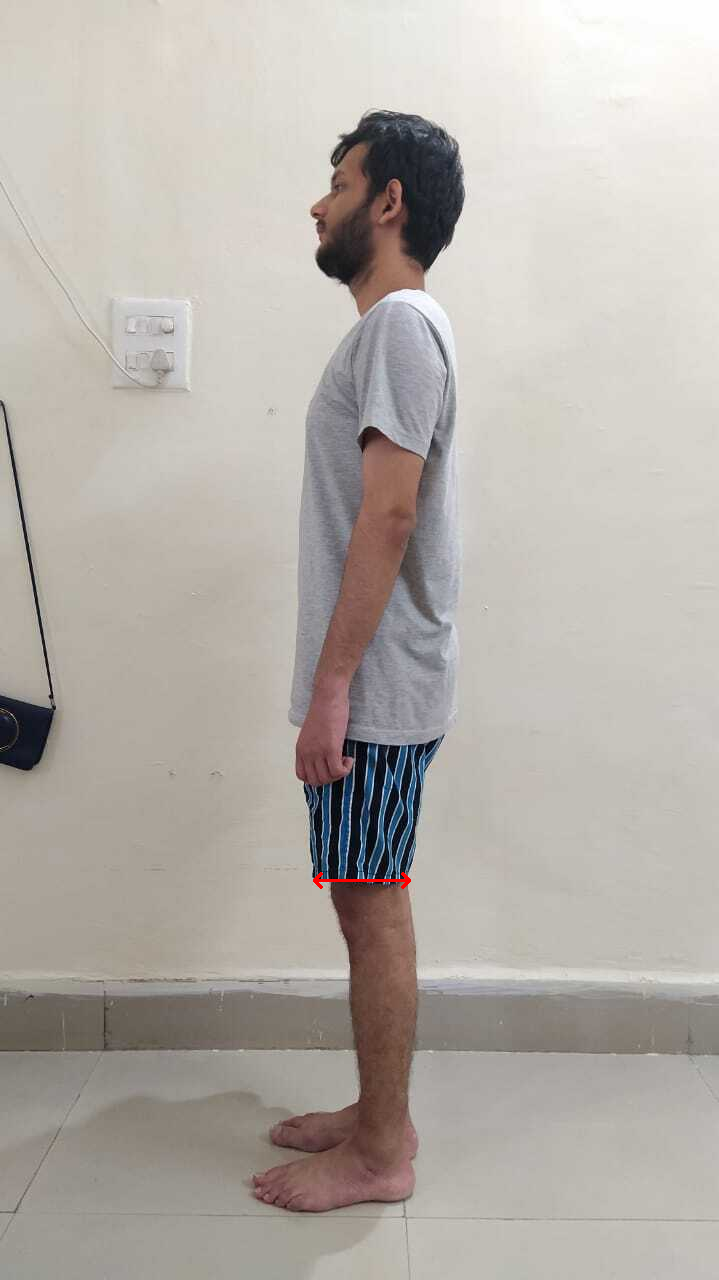

((865, 350),
 (865, 453),
 (726, 254),
 (930, 284),
 (880, 314),
 (880, 409),
 array([[[182, 192, 199],
         [182, 192, 199],
         [182, 192, 199],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[191, 201, 208],
         [191, 201, 208],
         [191, 201, 208],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        [[195, 205, 212],
         [195, 205, 212],
         [195, 205, 212],
         ...,
         [254, 254, 254],
         [254, 254, 254],
         [254, 254, 254]],
 
        ...,
 
        [[181, 181, 181],
         [182, 182, 182],
         [182, 182, 182],
         ...,
         [199, 202, 206],
         [199, 202, 206],
         [199, 202, 206]],
 
        [[182, 182, 182],
         [182, 182, 182],
         [183, 183, 183],
         ...,
         [198, 201, 205],
         [198, 201, 205],
         [198, 201, 205]],
 
        [[182, 182, 182],
         [182, 1

In [ ]:
fit_rotated_rectangle_on_thighs(i1,m1,i2,m2,True)

In [ ]:
def get_measurements(i1, m1, i2, m2, actual_height, visualize=False,waist_r1=None,waist_r2=None,chest_r1=None,chest_r2=None,actual_chest=None):
  m1 = remove_unwanted_person_seg(m1)
  m2 = remove_unwanted_person_seg(m2)

  p1, p2, p3, p4 = get_ankle_pixels(i1, m1)

  if p1[0] < 0:
    print("ankle not right ig")
    return False, -1, -1, -1, -1, -1, i1, i2



  # get side view full height and torse+head ratio
  side_full_height_pixels, side_head_torse_height_pixels = get_human_head_torse_fraction_of_actual_height(i2, m2)

  # calculate front view expected full heigt pixels using only head+torse pixels
  real_front_height_pixels, front_head_torse_height_pixels = get_human_head_torse_fraction_of_actual_height(i1, m1)
  front_full_height_pixels = front_head_torse_height_pixels *(side_full_height_pixels / side_head_torse_height_pixels)
  print ( 's_full: side_full_height_pixels',side_full_height_pixels)
  print ('s_head-torse: side_head_torse_height_pixels',side_head_torse_height_pixels)
  print ('f_full: real_front_height_pixels ', real_front_height_pixels)
  print ('f_head-torse: front_head_torse_height_pixels',front_head_torse_height_pixels)
  print ('calculated_front_height_pixels = (s_full/s_head-torse)*(f_head_torse) = ', front_full_height_pixels)

  i1, front_waist_dim, front_chest_dim, _ = get_front_chest_and_waist(i1, m1)
  shoulder_ = get_shoulder(i1, m1)
  i2, side_waist_dim, side_chest_dim, _ = get_side_chest_and_waist(i2, m2)
  i1, sleeve_start_pixel_loc, sleeve_final_pixel_loc = get_sleeve_points(i1, m1)
  start_pixel_loc, final_pixel_loc, mid_pixel_loc, forth_pixel_loc, side_f_point, side_s_point, image, side_image, status = fit_rotated_rectangle_on_thighs(i1, m1, i2, m2)

  if status == True:
    side_cm_per_pixel = actual_height/side_full_height_pixels
    front_cm_per_pixel = actual_height/front_full_height_pixels

    print ('\nside_cm_per_pixel= actual_height/side_full_height_pixels= ',side_cm_per_pixel)
    print ('front_cm_per_pixel= actual_height/calculated_front_height_pixels= ',front_cm_per_pixel)
    print ('--------------------------------------------------')
    side_waist_in_cm = side_waist_dim*side_cm_per_pixel
    front_waist_in_cm = front_waist_dim*front_cm_per_pixel

    print ('\n')
    print ('waist = 2*(22/7)*np.sqrt(0.5*r1*r1 + 0.5*r2*r2)','where r1 and r2 are half of front and side waist')
    if waist_r1 is not None and waist_r2 is not None:
      print ('Actual_front-waist_in_cm = ',waist_r1)
      print ('Actual_side-waist_in_cm = ',waist_r2)
      r1 = waist_r1/2
      r2 = waist_r2/2
      waist = 2*(22/7)*np.sqrt(0.5*r1*r1 + 0.5*r2*r2)
      print ('Using these as r1 and r2 , waist = ',waist,'\n')

    r1 = front_waist_in_cm/2
    r2 = side_waist_in_cm/2
    waist = 2*(22/7)*np.sqrt(0.5*r1*r1 + 0.5*r2*r2)
    print ('front_waist_in_cm = 2*r1 = ',2*r1)
    print ('side_waist_in_cm = 2*r2 = ' ,2*r2)
    print ('waist_in_cm', waist, ' and in inches ', waist/2.54)
    print ('-------------------------------------------------')

    side_chest_in_cm = side_chest_dim*side_cm_per_pixel
    front_chest_in_cm = front_chest_dim*front_cm_per_pixel
    shoulder_in_cm = shoulder_ * front_cm_per_pixel

    if chest_r1 is not None and chest_r2 is not None:
      print ('Actual_front-chest_in_cm = ',chest_r1)
      print ('Actual_side-chest_in_cm = ',chest_r2)
      if actual_chest is not None:
        print ('Actual_chest_circumference_in_cm = ',actual_chest)
      r1 = chest_r1/2
      r2 = chest_r2/2
      chest_ell = (2*(3.1415926535)*np.sqrt(0.5*r1*r1 + 0.5*r2*r2))/2
      chest_rec = 2*r1+2*r2
      chest = chest_ell+chest_rec
      print ('Using these as r1 and r2, Assuming chest to be ellipse: ',2*chest_ell,' Assuming it to be rectangle: ',2*chest_rec )
      print ('chest_in_cm (using average of both)', chest, ' and in inches ', chest/2.54,'\n')

    r1 = front_chest_in_cm/2
    r2 = side_chest_in_cm/2
    chest_ell = (2*(3.1415926535)*np.sqrt(0.5*r1*r1 + 0.5*r2*r2))/2
    chest_rec = 2*r1+2*r2
    chest = chest_ell+chest_rec
    print ('front_chest_in_cm = 2*r1 = ',2*r1)
    print ('side_chest_in_cm = 2*r2 = ' ,2*r2)
    print ('Assuming chest to be ellipse: ',2*chest_ell,' Assuming it to be rectangle: ',2*chest_rec )
    print ('chest_in_cm (using average of both)', chest, ' and in inches ', chest/2.54)
    print ('-------------------------------------------------')
    print ('\nshoulder_in_cm', shoulder_in_cm, ' and in inches ', shoulder_in_cm/2.54)
    print (' ')


    side_thigh_dim = np.sqrt( (side_f_point[0] - side_s_point[0])*(side_f_point[0] - side_s_point[0]) + (side_f_point[1] - side_s_point[1])*(side_f_point[1] - side_s_point[1]))
    front_thigh_dim = np.sqrt( (final_pixel_loc[0] - start_pixel_loc[0])*(final_pixel_loc[0] - start_pixel_loc[0]) + (final_pixel_loc[1] - start_pixel_loc[1])*(final_pixel_loc[1] - start_pixel_loc[1]))
    side_thigh_in_cm = side_thigh_dim*side_cm_per_pixel
    front_thigh_in_cm = front_thigh_dim*front_cm_per_pixel
    r1 = front_thigh_in_cm/2
    r2 = side_thigh_in_cm/2
    thigh = 2*(22/7)*np.sqrt(0.5*r1*r1 + 0.5*r2*r2)
    # print ('thigh_in_cm', thigh, ' and in inches ', thigh/2.54)

    
    front_sleeve_dim = np.sqrt( (sleeve_final_pixel_loc[0] - sleeve_start_pixel_loc[0])*(sleeve_final_pixel_loc[0] - sleeve_start_pixel_loc[0]) + (sleeve_final_pixel_loc[1] - sleeve_start_pixel_loc[1])*(sleeve_final_pixel_loc[1] - sleeve_start_pixel_loc[1]))
    front_sleeve_in_cm = front_sleeve_dim*front_cm_per_pixel
    # print ('sleeve_in_cm', front_sleeve_in_cm, ' and in inches ', front_sleeve_in_cm/2.54)


    dis_array2 = []
    p1_thigh_dis = np.sqrt( (final_pixel_loc[0] - p1[1])*(final_pixel_loc[0] - p1[1]) + (final_pixel_loc[1] - p1[0])*(final_pixel_loc[1] - p1[0]))
    p2_thigh_dis = np.sqrt( (final_pixel_loc[0] - p2[1])*(final_pixel_loc[0] - p2[1]) + (final_pixel_loc[1] - p2[0])*(final_pixel_loc[1] - p2[0]))
    p3_thigh_dis = np.sqrt( (final_pixel_loc[0] - p3[1])*(final_pixel_loc[0] - p3[1]) + (final_pixel_loc[1] - p3[0])*(final_pixel_loc[1] - p3[0]))
    p4_thigh_dis = np.sqrt( (final_pixel_loc[0] - p4[1])*(final_pixel_loc[0] - p4[1]) + (final_pixel_loc[1] - p4[0])*(final_pixel_loc[1] - p4[0]))
    dis_array2.append(p1_thigh_dis)
    dis_array2.append(p2_thigh_dis)
    dis_array2.append(p3_thigh_dis)
    dis_array2.append(p4_thigh_dis)
    index2 = np.argmin(dis_array2)

    dis_array = []

    if index2 < 2:
      p1_thigh_dis = np.sqrt( (start_pixel_loc[0] - p1[1])*(start_pixel_loc[0] - p1[1]) + (start_pixel_loc[1] - p1[0])*(start_pixel_loc[1] - p1[0]))
      p2_thigh_dis = np.sqrt( (start_pixel_loc[0] - p2[1])*(start_pixel_loc[0] - p2[1]) + (start_pixel_loc[1] - p2[0])*(start_pixel_loc[1] - p2[0]))
      dis_array.append(p1_thigh_dis)
      dis_array.append(p2_thigh_dis)
    else:
      p3_thigh_dis = np.sqrt( (start_pixel_loc[0] - p3[1])*(start_pixel_loc[0] - p3[1]) + (start_pixel_loc[1] - p3[0])*(start_pixel_loc[1] - p3[0]))
      p4_thigh_dis = np.sqrt( (start_pixel_loc[0] - p4[1])*(start_pixel_loc[0] - p4[1]) + (start_pixel_loc[1] - p4[0])*(start_pixel_loc[1] - p4[0]))
      dis_array.append(p3_thigh_dis)
      dis_array.append(p4_thigh_dis)
    


    index = np.argmin(dis_array)
    dis = dis_array[index]
    dis_in_cm = dis*front_cm_per_pixel
    # print ('length_in_cm', dis_in_cm, ' and in inches ', dis_in_cm/2.54)

    p = (start_pixel_loc[1], start_pixel_loc[0])
    p_ = (0, 0)

    if ((index == 0) & (index2 < 2)):
      p_ = (p1[0], p1[1])

    if ((index == 1) & (index2 < 2)):
      p_ = (p2[0], p2[1])

    if ((index == 0) & (index2 > 1)):
      p_ = (p3[0], p3[1])

    if ((index == 1) & (index2 > 1)):
      p_ = (p4[0], p4[1])

    

    cv2.arrowedLine(image, p_, p, (0,0,255), 2, tipLength = 0.03)
    cv2.arrowedLine(image, p, p_, (0,0,255), 2, tipLength = 0.03)

    # cv2.imshow('image', image)
    # cv2.imshow('side_image', side_image)
    # cv2.waitKey(1)


    return True, waist, chest, thigh, front_sleeve_in_cm, dis_in_cm, image, side_image
    



  else:
    print ("need to get clear images, Can not find the dimensions")
    return False, -1, -1, -1, -1, -1, None, None

In [ ]:
def remove_unwanted_person_seg(mask, Visualize=False):
	mask_array = np.array(mask, np.uint8)

	complete_body_array = 255*np.ones(mask_array.shape, np.uint8)
	x = (mask_array[:,:,0] == 0) & (mask_array[:,:,1] == 0) & (mask_array[:,:,2] == 0)
	complete_body_array[x, :] = [0,0,0]

	if Visualize:
		cv2.imshow('Raw mask', mask)

	complete_body_array = cv2.cvtColor(complete_body_array,cv2.COLOR_RGB2GRAY)

	(major, minor, _) = cv2.__version__.split(".")
	if (np.int(major) >= 4):
		contours, _ = cv2.findContours(complete_body_array, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
	else:
		_, contours, _ = cv2.findContours(complete_body_array, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

	num_pts = 0
	index = -1
	for j in range(len(contours)):
		pts = cv2.contourArea(contours[j])
		if pts > num_pts:
			index = j
			num_pts = pts

	if index >= 0:
		complete_body_array = np.zeros(mask_array.shape, np.uint8)
		cv2.drawContours(complete_body_array, contours, index, (255,255,255), -1)
		x = (complete_body_array[:,:,0] == 0) & (complete_body_array[:,:,1] == 0) & (complete_body_array[:,:,2] == 0)
		mask[x, :] = [0,0,0]
	
	
	if Visualize:
		cv2.imshow('After processing', mask)
		cv2.waitKey(1)

	return mask

In [ ]:
i1 = cv2.imread('_front_real.jpg') ; m1 = cv2.imread('_front_seg.png')
i2 = cv2.imread('_side_real.jpg') ; m2 = cv2.imread('_side_seg.png')
_ = get_measurements(i1,m1,i2,m2,167,False,chest_r1=31,chest_r2=22,actual_chest=87)

s_full: side_full_height_pixels 1109
s_head-torse: side_head_torse_height_pixels 583
f_full: real_front_height_pixels  948
f_head-torse: front_head_torse_height_pixels 513
calculated_front_height_pixels = (s_full/s_head-torse)*(f_head_torse) =  975.8439108061749

side_cm_per_pixel= actual_height/side_full_height_pixels=  0.15058611361587015
front_cm_per_pixel= actual_height/calculated_front_height_pixels=  0.1711339263899655
--------------------------------------------------


waist = 2*(22/7)*np.sqrt(0.5*r1*r1 + 0.5*r2*r2) where r1 and r2 are half of front and side waist
front_waist_in_cm = 2*r1 =  32.51544601409344
side_waist_in_cm = 2*r2 =  14.305680793507666
waist_in_cm 78.94475325467062  and in inches  31.080611517586856
-------------------------------------------------
Actual_front-chest_in_cm =  31
Actual_side-chest_in_cm =  22
Actual_chest_circumference_in_cm =  87
Using these as r1 and r2, Assuming chest to be ellipse:  84.44400025685329  Assuming it to be rectangle:  106.0
ch

#SIZE RECOMMENDATION

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import json
%cd /content/drive/MyDrive/Clothsize_recommender/sizefit_dataset/modcloth

/content/drive/MyDrive/Clothsize_recommender/sizefit_dataset/modcloth


In [ ]:
def get_data(str):
  if str == 'modcloth':
    %cd /content/drive/MyDrive/Clothsize_recommender/sizefit_dataset/modcloth
    data = [json.loads(line) for line in open('modcloth_final_data.json', 'r')]
    return data
  elif str == 'renttherunway':
    %cd /content/drive/MyDrive/Clothsize_recommender/sizefit_dataset/renttherunway
    data = [json.loads(line) for line in open('renttherunway_final_data.json', 'r')]   
    return data
  else:
    print('Please print valid name') 

In [ ]:
def count_dicts_with(keys):
  print('total dictionaries are ', len(data)); print('------------------')
  for key in keys:
    print(sum(new_dict[key][1]) , ' many dictionaries contain ',key)

def print_stats(key,len):
  print(key,'  count')
  print('----------------------')
  for i in range(len):
    print(new_dict[key][0][i],'   ',new_dict[key][1][i])    

def stats(key,num=None):
  length = len(new_dict[key][0])
  print(sum(new_dict[key][1]) , ' many dictionaries contain this key ')
  if num is not None:
    if num > length:
      print('there are only ',length,' entries')
      print_stats(key,length)
    else:
      print_stats(key,num)
  else:
    print_stats(key,length)   

In [ ]:
def analyze_these_keys(imp_keys):
  new_dict = {}
  for key in imp_keys:
    arr = []
    for this_dict in data:
      if key in this_dict:
        arr.append(this_dict[key])
    tuple = np.unique(arr,return_counts=True)
    # print(len(arr)) 
    new_dict[key] = (tuple[0][np.argsort(tuple[1])[::-1]], np.sort(tuple[1])[::-1])
  return new_dict

In [ ]:
def categorize_by_typeofcloth(sort_by='count'):
  #sort by can be by count or size
  cloth_dict = {}
  for this_dict in data:
    if 'category' in this_dict:
      ctg = this_dict['category']
      size = this_dict['size']
      if ctg in cloth_dict:
        cloth_dict[ctg].append(size)
      else:
        cloth_dict[ctg] = []
        cloth_dict[ctg].append(size)
  for key in cloth_dict.keys():
    sizes = cloth_dict[key]
    tuple = np.unique(sizes,return_counts=True)
    if sort_by=='size':
      cloth_dict[key] = (np.sort(tuple[0]), tuple[1][np.argsort(tuple[0])])
    else:
      cloth_dict[key] = (tuple[0][np.argsort(tuple[1])[::-1]], np.sort(tuple[1])[::-1])
  return cloth_dict
def print_clothsize_stats_for(keys,cloth_dict):
  for key in keys:
    print(key); print('-----')
    print('size    count')
    for i in range(len(cloth_dict[key][0])):
      print(cloth_dict[key][0][i],'    ',cloth_dict[key][1][i])
    print('\n')

#Modcloth

In [ ]:
# RuN THIS BEFORE PROCEEDING TO THE SUBSEQUENT CELLS, THEY WON'T RUN WITHOUT THIS
data = get_data('modcloth')

/content/drive/MyDrive/Clothsize_recommender/sizefit_dataset/modcloth


In [ ]:
# list_of_items = ['bust', 'hips' , 'size' , 'fit']
# for items in [list_of_items[:i] for i in range(1,5)]:
#   persons = []
#   for i in range(len(data)):
#     if all(item in data[i] for item in items):
#       persons.append({key:data[i][key] for key in items})
#   print(items , ' in ',len(persons),' dictionaries ')

['bust']  in  11854  dictionaries 
['bust', 'hips']  in  10886  dictionaries 
['bust', 'hips', 'size']  in  10886  dictionaries 
['bust', 'hips', 'size', 'fit']  in  10886  dictionaries 


In [ ]:
# #Uniques keys in this json file
# keys = set(data[0].keys())
# for dict in data:
#   keys = set(dict.keys())|keys
# keys = list(keys)
# # These are all the keys that are present
# print('These are all the keys '); print('-------------------')
# for i in range(0,len(keys),2):
#   print(str(' '*15).join(keys[i:i+2]))

These are all the keys 
-------------------
waist               fit
height               quality
review_summary               item_id
bra size               shoe width
size               hips
user_id               bust
user_name               shoe size
cup size               review_text
length               category


In [ ]:
# Get all the unique possible values of each imp_key and each value's count
imp_keys = ['item_id','size','waist','user_id','cup size','hips','bust','bra size','category','height']
new_dict = analyze_these_keys(imp_keys)

In [ ]:
count_dicts_with(imp_keys)

total dictionaries are  82790
------------------
82790  many dictionaries contain  item_id
82790  many dictionaries contain  size
2882  many dictionaries contain  waist
82790  many dictionaries contain  user_id
76535  many dictionaries contain  cup size
56064  many dictionaries contain  hips
11854  many dictionaries contain  bust
76772  many dictionaries contain  bra size
82790  many dictionaries contain  category
81683  many dictionaries contain  height


In [ ]:
stats('category')

82790  many dictionaries contain this key 
category   count
----------------------
new     21488
tops     20364
dresses     18650
bottoms     15266
outerwear     4223
sale     2524
wedding     275


In [ ]:
cloth_dict = categorize_by_typeofcloth(sort_by='size')

In [ ]:
print_clothsize_stats_for(['tops'],cloth_dict)

tops
-----
size    count
0      7
1      316
4      3717
5      4
6      5
7      7
8      4944
9      2
10      6
11      1
12      4845
13      2
15      1224
20      2188
26      1565
31      1
32      994
38      536






---



---



# Testing size recommender

#WOMEN




In [ ]:
# First run this
data = get_data('modcloth')

/content/drive/MyDrive/Clothsize_recommender/sizefit_dataset/modcloth


In [ ]:
persons = []
items = ['bust','waist', 'size' , 'fit']
for i in range(len(data)):
  if all(item in data[i] for item in items):
    persons.append({key:data[i][key] for key in items})  
# print(len(persons),' data points containing both bust and waist are there','\nsome of them are ')  
# for person in persons[130:140]:
#   print(person)

784  data points containing both bust and waist are there 
some of them are 
{'bust': '35', 'waist': '28', 'size': 8, 'fit': 'fit'}
{'bust': '38', 'waist': '31', 'size': 12, 'fit': 'fit'}
{'bust': '39', 'waist': '30', 'size': 12, 'fit': 'fit'}
{'bust': '32', 'waist': '29', 'size': 4, 'fit': 'fit'}
{'bust': '36', 'waist': '29', 'size': 8, 'fit': 'fit'}
{'bust': '38', 'waist': '31', 'size': 15, 'fit': 'large'}
{'bust': '37', 'waist': '30', 'size': 8, 'fit': 'fit'}
{'bust': '36', 'waist': '30', 'size': 8, 'fit': 'fit'}
{'bust': '37', 'waist': '33', 'size': 12, 'fit': 'large'}
{'bust': '36', 'waist': '26', 'size': 4, 'fit': 'large'}


In [ ]:
def categorize_data_by_size(data):
  tuple = np.unique([this_dict['size'] for this_dict in data],return_counts=True)
  return_count_dict = [{'size':tuple[0][i],'count':tuple[1][i]} for i in range(len(tuple[0]))]
  return_dict = [data[i] for i in np.argsort([this_dict['size'] for this_dict in data])]
  return return_dict, return_count_dict
sorted_persons_by_size ,count_dict = categorize_data_by_size(persons)

In [ ]:
# print('Out of those 784 data points, the no. of data points for each size are as follows')
# for i in count_dict:
#   print(i)

Out of those 784 data points, the no. of data points for each size are as follows
{'size': 1, 'count': 44}
{'size': 3, 'count': 3}
{'size': 4, 'count': 135}
{'size': 5, 'count': 4}
{'size': 6, 'count': 5}
{'size': 7, 'count': 10}
{'size': 8, 'count': 226}
{'size': 9, 'count': 5}
{'size': 10, 'count': 2}
{'size': 11, 'count': 3}
{'size': 12, 'count': 155}
{'size': 13, 'count': 1}
{'size': 15, 'count': 98}
{'size': 18, 'count': 3}
{'size': 20, 'count': 46}
{'size': 26, 'count': 30}
{'size': 32, 'count': 12}
{'size': 33, 'count': 1}
{'size': 38, 'count': 1}


In [ ]:
size_list = ['00','0','2','4','6','8','10','12','14','16','18','20','22','24','26','28','30']
bust_list =  [31,32,33,34,35,36,37.5,39,41,43,45,46.5,48,50.5,53, 55 ,57]
waist_list = [23,24,25,26,27,28,29.5,31,33,35,37,38.5,40,42.5,45,47,49]


def make_size_chart(sizes,bust,waist):
  size_chart = {}
  for i,size in enumerate(sizes):
    size_chart[size] = {'bust':bust[i],'waist':waist[i]}
  return size_chart
chart = make_size_chart(size_list,bust_list,waist_list)


def just_bigger_idx(what,size):
  just_bigger = 0
  if what=='bust':
    while size>bust_list[just_bigger]:
      just_bigger=just_bigger+1
  else:
    while size>waist_list[just_bigger]:
      just_bigger=just_bigger+1
  return just_bigger

In [ ]:
def size_recommender_women(bust,waist):
  for size in size_list:
    if bust==chart[size]['bust'] and waist==chart[size]['waist']:
      return size

  if bust>bust_list[-1]:
    return 'bust_too_large'
  elif waist>waist_list[-1]:
    return 'waist_too_large'
  else:
    for idx,size in enumerate(size_list):
      # if the bust size is present in chart, the range will be either that or bigger
      if bust in bust_list and waist in waist_list:
        bust_idx =  bust_list.index(bust)
        waist_idx = waist_list.index(waist)
        if waist_idx<=bust_idx:
          return size_list[bust_idx]
        else:
          if (waist_idx-bust_idx)%2==0:
            return size_list[int((bust_idx+waist_idx)/2)]
          else:
            return size_list[int((bust_idx+waist_idx)/2)+1]

      elif bust in bust_list:
        bust_idx = bust_list.index(bust)
        if just_bigger_idx('waist',waist)<=bust_idx:
          return size_list[bust_idx]
        else:
          if (just_bigger_idx('waist',waist)-bust_idx)%2==0:
            return size_list[int((just_bigger_idx('waist',waist)+bust_idx)/2)]
          else:
            return  size_list[int((just_bigger_idx('waist',waist)+bust_idx)/2)+1]

      elif waist in waist_list:
        waist_idx = waist_list.index(waist)
        just_bigger_bust_idx = just_bigger_idx('bust',bust)
        if just_bigger_bust_idx>=waist_idx:
          return size_list[just_bigger_bust_idx]
        else:
          if (waist_idx-just_bigger_bust_idx)%2==0:
            return size_list[int((just_bigger_bust_idx+waist_idx)/2)]
          else:
            return size_list[int((just_bigger_bust_idx+waist_idx)/2)+1]


      else:
        # if the bust is between 2 ranges of size, then just smaller bust and all bigger than that will be eligible
        just_bigger_bust_idx = just_bigger_idx('bust',bust) 
        just_bigger_waist_idx = just_bigger_idx('waist',waist)
        if just_bigger_bust_idx>just_bigger_waist_idx:
          just_smaller_bust_idx = just_bigger_bust_idx-1
          return size_list[just_smaller_bust_idx]
        else:
          if (just_bigger_waist_idx-just_bigger_bust_idx)%2==0:
            return size_list[int((just_bigger_bust_idx+just_bigger_waist_idx)/2)]
          else:
            return  size_list[int((just_bigger_bust_idx+just_bigger_waist_idx)/2)+1]


In [ ]:
# Test here
for person in sorted_persons_by_size:
  try:
    bust = int(person['bust'])
  except ValueError:
    continue
  try:
    waist = int(person['waist'])
  except ValueError:
    continue
  print(person , ' size recommended by us is', size_recommender_women(bust,waist))

{'bust': '32', 'waist': '25', 'size': 1, 'fit': 'fit'}  size recommended by us is 2
{'bust': '34', 'waist': '26', 'size': 1, 'fit': 'fit'}  size recommended by us is 4
{'bust': '32', 'waist': '27', 'size': 1, 'fit': 'large'}  size recommended by us is 4
{'bust': '32', 'waist': '26', 'size': 1, 'fit': 'small'}  size recommended by us is 2
{'bust': '32', 'waist': '22', 'size': 1, 'fit': 'fit'}  size recommended by us is 0
{'bust': '32', 'waist': '24', 'size': 1, 'fit': 'small'}  size recommended by us is 0
{'bust': '31', 'waist': '27', 'size': 1, 'fit': 'fit'}  size recommended by us is 2
{'bust': '30', 'waist': '24', 'size': 1, 'fit': 'fit'}  size recommended by us is 0
{'bust': '32', 'waist': '24', 'size': 1, 'fit': 'fit'}  size recommended by us is 0
{'bust': '32', 'waist': '22', 'size': 1, 'fit': 'fit'}  size recommended by us is 0
{'bust': '34', 'waist': '27', 'size': 1, 'fit': 'small'}  size recommended by us is 6
{'bust': '32', 'waist': '26', 'size': 1, 'fit': 'fit'}  size recomme

# {'bust': '34', 'waist': '26', 'size': 1, 'fit': 'large'}  size recommended by us is 4<br>{'bust': '42', 'waist': '34', 'size': 26, 'fit': 'small'}  size recommended by us is 16<br>{'bust': '41', 'waist': '34', 'size': 12, 'fit': 'large'}  size recommended by us is 16<br>. This shows the dataset is flawed

#MEN 

In [ ]:
from math import ceil as ceil
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# %cd /content/drive/My Drive/Clothsize_recommender
# z = mpimg.imread('men_t-shirts_size-chart.JPG')

/content/drive/My Drive/Clothsize_recommender


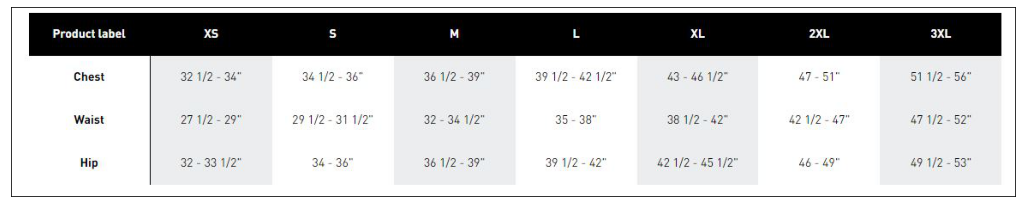

In [ ]:
# plt.figure(figsize=(18,13))
# plt.xticks([]);plt.yticks([]) ;plt.imshow(z)

In [ ]:
size_list = [  ' XS '  ,  '  S '   ,  ' M '  ,   ' L '   ,  ' XL ' , ' 2XL ' ,  ' 3XL ']
chest_list = [[32.5,34], [34.5,36] ,[36.5,39],[39.5,42.5],[43,46.5], [47,51] ,[51.5,56]]
waist_list = [[27.5,29],[29.5,31.5],[32,34.5],  [35,38]  ,[38.5,42],[42.5,47],[47.5,52]]

def func_chest_idx(chest):
  if chest<chest_list[0][0]:
    return 'chest_too_short',''
  idx = 0
  while idx<len(chest_list) and chest>chest_list[idx][1]:
    idx=idx+1
  if idx>=len(chest_list):
    return 'chest_too_large',''
  elif chest<chest_list[idx][0]:
    return idx-0.5,''
  else:

    if chest<=sum(chest_list[idx])/2:
      return idx,'l'
    else:
      return idx,'r'
def func_waist_idx(waist):
  if waist<waist_list[0][0]:
    return 'waist_too_short',''
  idx = 0
  while idx<len(waist_list) and waist>waist_list[idx][1]:
    idx=idx+1
  if idx>=len(waist_list):
    return 'waist_too_large',''
  elif waist<waist_list[idx][0]:
    return idx-0.5,''
  else:

    if waist<=sum(waist_list[idx])/2:
      return idx,'l'
    else:
      return idx,'r'
  

In [ ]:
def size_recommender_men(chest,waist):
  chest_idx,chest_pos = func_chest_idx(chest) ; waist_idx,waist_pos = func_waist_idx(waist)


  if type(chest_idx)=='str' or type(waist_idx)=='str':
    if type(chest_idx)=='str':
      print(chest_idx)
    if type(waist_idx)=='str':
      print(waist_idx)

  else:
    # If both indexes match
    if chest_idx==waist_idx:
      if type(chest_idx) is not int:        # Size falling in between, ranges 
        return size_list[int(chest_idx)+1]
      else:                        # Size within ranges 
        return size_list[chest_idx]
    
    # If size according to chest is larger  
    elif chest_idx>waist_idx:
      return size_list[int(chest_idx)]

    # If size according to waist is larger
    else:
      if type(chest_idx) is not int:
        chest_idx = int(chest_idx)+1;chest_pos = 'l'
      if type(waist_idx) is not int:
        waist_idx = int(waist_idx)+1; chest_pos='r'

      if (waist_idx-chest_idx)%2==0:
        return size_list[(waist_idx+chest_idx)/2]
      else:
        if chest_pos=='r' and waist_pos=='r':
          return size_list[int((waist_idx+chest_idx)/2)+1]
        else:
          return size_list[int((waist_idx+chest_idx)/2)]

In [ ]:
print('SOME TESTING OF THE SIZE_RECOMMENDER_FOR_MEN')

for chest,waist in [(37,35),(42,38),(52,43),(41,49)]:
  print(' chest: ',chest, ', waist: ',waist,size_recommender_men(chest,waist))

SOME TESTING OF THE SIZE_RECOMMENDER_FOR_MEN
 chest:  37 , waist:  35  M 
 chest:  42 , waist:  38  L 
 chest:  52 , waist:  43  3XL 
 chest:  41 , waist:  49  XL 




---



---

